In [1]:
import pandas as pd 
import numpy as np 
import warnings

# Ignore the specific ParserWarning
warnings.simplefilter(action='ignore', category=pd.errors.ParserWarning)
# Load the dataset 
df = pd.read_csv('reviews.csv',index_col=False) 

In [2]:
df.shape[0]

3796

In [3]:
df.head()

,customer_name,rating,review_title,review_text,review_date,product_name
0,ARUN,5.0,Very Great Processor . . .,The processor was very power efficient i devel...,Reviewed in India on 24 April 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
1,Ayush,5.0,Got it under 10k,Try to get it under 10k and check the rankings...,Reviewed in India on 14 May 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
2,Hruaia,5.0,Highest Price to Performance processor for gam...,I upgrade from 9400f. The performance gain is ...,Reviewed in India on 24 March 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
3,Yavvari,4.0,No discrete graphics in this processor,"This will not work without graphic card, So be...",Reviewed in India on 18 February 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
4,Mr.GeAr,5.0,Nice processor under 12k,Best 👌 gaming and multitasking processor at th...,Reviewed in India on 7 April 2024,Intel Core I5 12400F 12 Gen Generation Desktop...


In [4]:
duplicated_rows = df.duplicated().sum()
print(duplicated_rows," Duplicated Rows")

450  Duplicated Rows


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_name  3796 non-null   object 
 1   rating         3796 non-null   float64
 2   review_title   760 non-null    object 
 3   review_text    3737 non-null   object 
 4   review_date    3796 non-null   object 
 5   product_name   3796 non-null   object 
dtypes: float64(1), object(5)
memory usage: 178.1+ KB


In [6]:
# Categorical columns 
cat_col = [col for col in df.columns if df[col].dtype == 'object'] 
print('Categorical columns :',cat_col) 
# Numerical columns 
num_col = [col for col in df.columns if df[col].dtype != 'object'] 
print('Numerical columns :',num_col)


Categorical columns : ['customer_name', 'review_title', 'review_text', 'review_date', 'product_name']
Numerical columns : ['rating']


In [7]:
df[cat_col].nunique()

customer_name    2464
review_title      468
review_text      2783
review_date      2059
product_name       58
dtype: int64

In [8]:
df['product_name'].unique()

array(['Intel Core I5 12400F 12 Gen Generation Desktop Pc Processor 6',
       'Intel Core I5 12400F 12 Gen Generation Desktop Pc Processor 6 CPU with 18Mb Cache and Up to 4.40 Ghz Clock Speed Ddr5 and Ddr4 Ram Support Lga 1700 Socket Micro ATX',
       'Intel Core i5-12600K Desktop Processor 10 (6P+4E) Cores up to 4.9 GHz Unlocked Socket LGA 1700 600 Series Chipset 125W',
       'Intel Core I5-13400F Processor 20M Cache Up to 4.60 Ghz LGA 1700',
       "Intel Core i5-13600K Desktop Processor 14 cores (6 P-cores + 8 E-cores) 24M Cache up to 5.1 GHz' Socket LGA 1700",
       'Intel Core I5-13400 Processor 20M Cache Up to 4.60 Ghz LGA 1700',
       'Intel Core i5-13500 Processor LGA 1700 24M Cache up to 4.80 GHz',
       'Intel Core I5-13600K Processor 24M Cache Up to 5.10 Ghz LGA 1700',
       'Intel® Core™ i5-13600KF Processor 24M Cache up to 5.10 GHz',
       "Intel Core i5-13600KF Desktop Processor 14 cores (6 P-cores + 8 E-cores) 24M Cache up to 5.1 GHz' LGA 1700",
       'Intel Cor

In [9]:
# null values percentage in each column
round((df.isnull().sum()/df.shape[0])*100,2)

customer_name     0.00
rating            0.00
review_title     79.98
review_text       1.55
review_date       0.00
product_name      0.00
dtype: float64

In [10]:
# We will drop the review_title column. 
# We drop the null values rows of review_text column.
df1 = df.drop(columns='review_title') 
df1.dropna(subset=['review_text'], axis=0, inplace=True) 
df1.shape

(3737, 5)

In [11]:
df1

,customer_name,rating,review_text,review_date,product_name
0,ARUN,5.0,The processor was very power efficient i devel...,Reviewed in India on 24 April 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
1,Ayush,5.0,Try to get it under 10k and check the rankings...,Reviewed in India on 14 May 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
2,Hruaia,5.0,I upgrade from 9400f. The performance gain is ...,Reviewed in India on 24 March 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
3,Yavvari,4.0,"This will not work without graphic card, So be...",Reviewed in India on 18 February 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
4,Mr.GeAr,5.0,Best 👌 gaming and multitasking processor at th...,Reviewed in India on 7 April 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
...,...,...,...,...,...
3791,x raiders,5.0,Excellent at really affordable price!passed by...,Reviewed in Italy on 16 October 2023,Intel CORE I3-12100F Desktop Processor Core Up...
3792,Mayard,5.0,"Very good product, perfect value for money, I ...",Reviewed in Belgium on 27 May 2024,Intel CORE I3-12100F Desktop Processor Core Up...
3793,Lucas Sulaiman,5.0,Absolute beast for £100 that competes well and...,Reviewed in the United Kingdom on 27 December ...,Intel CORE I3-12100F Desktop Processor Core Up...
3794,Kevin,5.0,I'm sure I'm stealing someone else description...,Reviewed in Australia on 8 February 2023,Intel CORE I3-12100F Desktop Processor Core Up...


In [12]:
df

,customer_name,rating,review_title,review_text,review_date,product_name
0,ARUN,5.0,Very Great Processor . . .,The processor was very power efficient i devel...,Reviewed in India on 24 April 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
1,Ayush,5.0,Got it under 10k,Try to get it under 10k and check the rankings...,Reviewed in India on 14 May 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
2,Hruaia,5.0,Highest Price to Performance processor for gam...,I upgrade from 9400f. The performance gain is ...,Reviewed in India on 24 March 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
3,Yavvari,4.0,No discrete graphics in this processor,"This will not work without graphic card, So be...",Reviewed in India on 18 February 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
4,Mr.GeAr,5.0,Nice processor under 12k,Best 👌 gaming and multitasking processor at th...,Reviewed in India on 7 April 2024,Intel Core I5 12400F 12 Gen Generation Desktop...
...,...,...,...,...,...,...
3791,x raiders,5.0,OTTIMO,Excellent at really affordable price!passed by...,Reviewed in Italy on 16 October 2023,Intel CORE I3-12100F Desktop Processor Core Up...
3792,Mayard,5.0,"Reçus dans les temps, très bon produit","Very good product, perfect value for money, I ...",Reviewed in Belgium on 27 May 2024,Intel CORE I3-12100F Desktop Processor Core Up...
3793,Lucas Sulaiman,5.0,Budget king,Absolute beast for £100 that competes well and...,Reviewed in the United Kingdom on 27 December ...,Intel CORE I3-12100F Desktop Processor Core Up...
3794,Kevin,5.0,The little chip that could,I'm sure I'm stealing someone else description...,Reviewed in Australia on 8 February 2023,Intel CORE I3-12100F Desktop Processor Core Up...


In [13]:
num_null_ratings = df1['rating'].isnull().sum()
print(f"Number of rows with null values in the 'rating' column: {num_null_ratings}")

Number of rows with null values in the 'rating' column: 0


In [14]:
# Calculate the mean, median, and standard deviation
mean_rating = df1['rating'].mean()
median_rating = df1['rating'].median()
std_rating = df1['rating'].std()

print(f"Mean rating: {mean_rating}")
print(f"Median rating: {median_rating}")
print(f"Standard Deviation of rating: {std_rating}")

Mean rating: 4.56007492641156
Median rating: 5.0
Standard Deviation of rating: 1.0306807352960665


In [15]:
rating_counts = df1['rating'].value_counts()
print(rating_counts)
print("\n--------- After sorting ---------\n")
rating_counts_sorted = rating_counts.sort_index(ascending=False)
print(rating_counts_sorted)

rating
5.0    2946
4.0     402
1.0     207
3.0     132
2.0      50
Name: count, dtype: int64

--------- After sorting ---------

rating
5.0    2946
4.0     402
3.0     132
2.0      50
1.0     207
Name: count, dtype: int64


In [16]:
specific_value = 4.0

# Count the number of rows with the specific value in the 'rating' column
num_specific_value = (df1['rating'] == specific_value).sum()
print(f"Number of rows with rating {specific_value}: {num_specific_value}")

Number of rows with rating 4.0: 402


In [17]:
# data with rating 2.0
rating_2_df = df1.loc[(df1['rating'] == 2.0) | (df1['rating'] == 1.0), ['product_name','rating','review_text','review_date']]
print("Rows with rating 2.0:")
print(rating_2_df)
#print(rating_2_df.to_string(index=False))

Rows with rating 2.0:
                                           product_name  rating  \
10    Intel Core I5 12400F 12 Gen Generation Desktop...     2.0   
11    Intel Core I5 12400F 12 Gen Generation Desktop...     1.0   
28    Intel Core I5 12400F 12 Gen Generation Desktop...     1.0   
33    Intel Core I5 12400F 12 Gen Generation Desktop...     1.0   
73    Intel Core I5 12400F 12 Gen Generation Desktop...     1.0   
...                                                 ...     ...   
3529  Intel CORE I3-12100F Desktop Processor Core Up...     1.0   
3578  Intel Core I3 (12Th Gen) I3-12100 Quad-Core (4...     1.0   
3647  Intel Core I3 (12Th Gen) I3-12100 Quad-Core (4...     2.0   
3677  Intel Core I3 (12Th Gen) I3-12100 Quad-Core (4...     1.0   
3746  Intel Core I3 (12Th Gen) I3-12100 Quad-Core (4...     2.0   

                                            review_text  \
10    Find Different Stores And Buy This At 25000INR...   
11    The processor is Good But too expensive here I...

In [18]:
rating_2_df.to_csv('negative_reviews.csv', index=False)

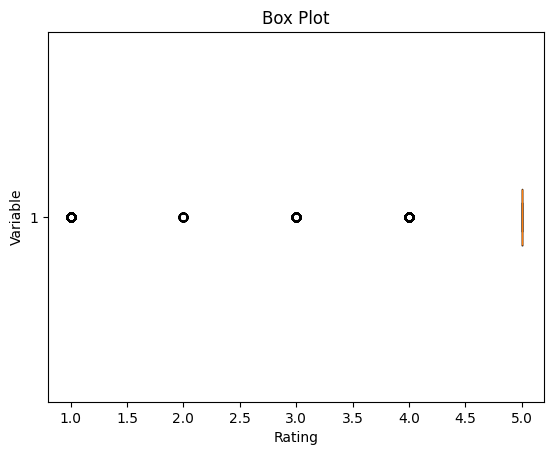

In [19]:
import matplotlib.pyplot as plt 

plt.boxplot(df1['rating'], vert=False) 
plt.ylabel('Variable') 
plt.xlabel('Rating') 
plt.title('Box Plot') 
plt.show()


In [20]:
df1['date'] = pd.to_datetime(df['review_date'].str.extract(r'on\s(\d+\s\w+\s\d{4})', expand=False))
df1['country'] = df1['review_date'].str.extract(r'in\s(.*?)\son', expand=False)

# Dropping the original review_date column
df1.drop(columns=['review_date'], inplace=True)

print(df1)

       customer_name  rating  \
0               ARUN     5.0   
1              Ayush     5.0   
2             Hruaia     5.0   
3            Yavvari     4.0   
4            Mr.GeAr     5.0   
...              ...     ...   
3791       x raiders     5.0   
3792          Mayard     5.0   
3793  Lucas Sulaiman     5.0   
3794           Kevin     5.0   
3795    Obed Córdova     5.0   

                                            review_text  \
0     The processor was very power efficient i devel...   
1     Try to get it under 10k and check the rankings...   
2     I upgrade from 9400f. The performance gain is ...   
3     This will not work without graphic card, So be...   
4     Best 👌 gaming and multitasking processor at th...   
...                                                 ...   
3791  Excellent at really affordable price!passed by...   
3792  Very good product, perfect value for money, I ...   
3793  Absolute beast for £100 that competes well and...   
3794  I'm sure I'm steali

In [21]:
duplicated_rows = df1.duplicated().sum()
print(duplicated_rows," Duplicated Rows")

625  Duplicated Rows


In [22]:
# drop duplicate rows based on all the columns
df_no_duplicates = df1.drop_duplicates()

In [23]:
duplicated_rows = df_no_duplicates.duplicated().sum()
print(duplicated_rows," Duplicated Rows")

0  Duplicated Rows


In [24]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
# Step 3: Normalize text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# df_no_duplicates['review_text'] = df_no_duplicates['review_text'].apply(clean_text)
df_no_duplicates.loc[:, 'review_text'] = df_no_duplicates['review_text'].apply(clean_text)


# Step 4: Perform sentiment analysis using VADER
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(row):
    score = analyzer.polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        return "Negative"
    elif pos > neg:
        return "Positive"
    else:
        return "Neutral"

# df_no_duplicates['sentiment'] = df_no_duplicates['review_text'].apply(get_sentiment)
df_no_duplicates.loc[:, 'sentiment'] = df_no_duplicates['review_text'].apply(get_sentiment)


# Display the sentiment counts
sentiment_counts = df_no_duplicates['sentiment'].value_counts()
print(sentiment_counts)

# Display the dataframe with sentiments
print(df_no_duplicates.head())

sentiment
Positive    2423
Negative     373
Neutral      316
Name: count, dtype: int64
  customer_name  rating                                        review_text  \
0          ARUN     5.0  the processor was very power efficient i devel...   
1         Ayush     5.0  try to get it under k and check the rankings i...   
2        Hruaia     5.0  i upgrade from f the performance gain is a hug...   
3       Yavvari     4.0  this will not work without graphic card so be ...   
4       Mr.GeAr     5.0  best gaming and multitasking processor at the ...   

                                        product_name       date country  \
0  Intel Core I5 12400F 12 Gen Generation Desktop... 2024-04-24   India   
1  Intel Core I5 12400F 12 Gen Generation Desktop... 2024-05-14   India   
2  Intel Core I5 12400F 12 Gen Generation Desktop... 2024-03-24   India   
3  Intel Core I5 12400F 12 Gen Generation Desktop... 2024-02-18   India   
4  Intel Core I5 12400F 12 Gen Generation Desktop... 2024-04-07   Ind

C:\Users\Admin\AppData\Local\Temp\ipykernel_23292\4127296400.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates.loc[:, 'sentiment'] = df_no_duplicates['review_text'].apply(get_sentiment)


In [25]:
# Group by 'product_name' and 'sentiment', then count the occurrences of each sentiment category
sentiment_counts = df_no_duplicates.groupby(['product_name', 'sentiment'])['sentiment'].count()

# Unstack the grouped DataFrame to pivot 'sentiment' into columns
sentiment_counts = sentiment_counts.unstack(level=-1, fill_value=0)

# Rename the columns for clarity
sentiment_counts.columns = ['Negative', 'Neutral', 'Positive']

# Display the resulting DataFrame
print(sentiment_counts)

                                                    Negative  Neutral  \
product_name                                                            
Boxed INTEL I3-13100F 12M Cache UP to 4.50GHZ              4        2   
Intel CORE I3-12100F Desktop Processor Core Up ...        13        5   
Intel Core I3 (12Th Gen) I3-12100 Quad-Core (4 ...         4       13   
Intel Core I3-13100 Processor (12M Cache Up to ...         2        1   
Intel Core I5 12400F 12 Gen Generation Desktop ...         0        1   
Intel Core I5 12400F 12 Gen Generation Desktop ...        19       20   
Intel Core I5-13400 Processor 20M Cache Up to 4...         1        3   
Intel Core I5-13400F Processor 20M Cache Up to ...         8       11   
Intel Core I5-13600K Processor 24M Cache Up to ...         7        7   
Intel Core I7 12700Kf 12Th Gen Desktop Processo...        12       16   
Intel Core I7-13700F Desktop Processor 16 Cores...         2        2   
Intel Core I7-13700K Processor 30M Cache Up to ... 

In [26]:
df_no_duplicates['product_name'].unique()

array(['Intel Core I5 12400F 12 Gen Generation Desktop Pc Processor 6',
       'Intel Core I5 12400F 12 Gen Generation Desktop Pc Processor 6 CPU with 18Mb Cache and Up to 4.40 Ghz Clock Speed Ddr5 and Ddr4 Ram Support Lga 1700 Socket Micro ATX',
       'Intel Core i5-12600K Desktop Processor 10 (6P+4E) Cores up to 4.9 GHz Unlocked Socket LGA 1700 600 Series Chipset 125W',
       'Intel Core I5-13400F Processor 20M Cache Up to 4.60 Ghz LGA 1700',
       "Intel Core i5-13600K Desktop Processor 14 cores (6 P-cores + 8 E-cores) 24M Cache up to 5.1 GHz' Socket LGA 1700",
       'Intel Core I5-13400 Processor 20M Cache Up to 4.60 Ghz LGA 1700',
       'Intel Core i5-13500 Processor LGA 1700 24M Cache up to 4.80 GHz',
       'Intel Core I5-13600K Processor 24M Cache Up to 5.10 Ghz LGA 1700',
       'Intel® Core™ i5-13600KF Processor 24M Cache up to 5.10 GHz',
       "Intel Core i5-13600KF Desktop Processor 14 cores (6 P-cores + 8 E-cores) 24M Cache up to 5.1 GHz' LGA 1700",
       'Intel Cor

In [27]:
# Function to categorize the product_name
def categorize_product(name):
    name = name.lower()
    if 'i5' in name:
        if '12 gen' in name or 'i5-12' in name:
            return 'Intel i5 12th gen processor'
        elif 'i5-13' in name:
            return 'Intel i5 13th gen processor'
        elif 'i5-14' in name:
            return 'Intel i5 14th gen processor'
    elif 'i7' in name:
        if '12 gen' in name or '12th gen' in name or 'i7-12' in name:
            return 'Intel i7 12th gen processor'
        elif 'i7-13' in name:
            return 'Intel i7 13th gen processor'
        elif 'i7-14' in name:
            return 'Intel i7 14th gen processor'
    elif 'i9' in name:
        if 'i9-12' in name:
            return 'Intel i9 12th gen processor'
        elif 'i9-13' in name:
            return 'Intel i9 13th gen processor'
        elif 'i9-14' in name:
            return 'Intel i9 14th gen processor'
    elif 'i3' in name:
        if 'i3-12' in name or '12th gen' in name:
            return 'Intel i3 12th gen processor'
        elif 'i3-13' in name:
            return 'Intel i3 13th gen processor'
        elif 'i3-14' in name:
            return 'Intel i3 14th gen processor'
    return 'Other'

# Apply the function to categorize the product_name column
# df_no_duplicates['category'] = df_no_duplicates['product_name'].apply(categorize_product)
df_no_duplicates.loc[:, 'category'] = df_no_duplicates['product_name'].apply(categorize_product)

# Display the DataFrame
print(df_no_duplicates)

       customer_name  rating  \
0               ARUN     5.0   
1              Ayush     5.0   
2             Hruaia     5.0   
3            Yavvari     4.0   
4            Mr.GeAr     5.0   
...              ...     ...   
3646        Jimcar81     5.0   
3653  Rolando Garcia     5.0   
3666    Amazon カスタマー     4.0   
3672           ヴォルク半     5.0   
3746      Hugo Audet     2.0   

                                            review_text  \
0     the processor was very power efficient i devel...   
1     try to get it under k and check the rankings i...   
2     i upgrade from f the performance gain is a hug...   
3     this will not work without graphic card so be ...   
4     best gaming and multitasking processor at the ...   
...                                                 ...   
3646  the processor has been working for more than m...   
3653  you will have more fps in most games than with...   
3666  i didnt play games on my pc so i decided to us...   
3672  i wanted to make i 

C:\Users\Admin\AppData\Local\Temp\ipykernel_23292\3454375506.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates.loc[:, 'category'] = df_no_duplicates['product_name'].apply(categorize_product)


In [28]:
df_no_duplicates['category'].unique()

array(['Intel i5 12th gen processor', 'Intel i5 13th gen processor',
       'Intel i5 14th gen processor', 'Intel i7 12th gen processor',
       'Intel i7 13th gen processor', 'Intel i7 14th gen processor',
       'Intel i9 12th gen processor', 'Intel i9 13th gen processor',
       'Intel i9 14th gen processor', 'Intel i3 12th gen processor',
       'Intel i3 13th gen processor', 'Intel i3 14th gen processor'],
      dtype=object)

In [29]:
statistics = df_no_duplicates.groupby('category')['rating'].agg(['mean', 'median', 'std'])

from IPython.display import display
# Style the DataFrame for better readability
styled_statistics = statistics.style.format({
    'mean': '{:.2f}',
    'median': '{:.2f}',
    'std': '{:.2f}'
}).set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
     {'selector': 'td', 'props': [('font-size', '12pt'), ('text-align', 'center')]}]
).set_properties(**{'background-color': '#f4f4f4', 'color': 'black', 'border-color': 'black'})

# Display the styled DataFrame
display(styled_statistics)

,mean,median,std
category,,,
Intel i3 12th gen processor,4.66,5.00,0.84
Intel i3 13th gen processor,4.57,5.00,1.01
Intel i3 14th gen processor,5.00,5.00,0.00
Intel i5 12th gen processor,4.30,5.00,1.30
Intel i5 13th gen processor,4.76,5.00,0.72
Intel i5 14th gen processor,4.59,5.00,0.93
Intel i7 12th gen processor,4.56,5.00,1.08
Intel i7 13th gen processor,4.69,5.00,0.81
Intel i7 14th gen processor,4.41,5.00,1.16


In [30]:
# Group by 'product_name' and 'sentiment', then count the occurrences of each sentiment category
sentiment_counts = df_no_duplicates.groupby(['category', 'sentiment'])['sentiment'].count()

# Unstack the grouped DataFrame to pivot 'sentiment' into columns
sentiment_counts = sentiment_counts.unstack(level=-1, fill_value=0)

# Rename the columns for clarity
sentiment_counts.columns = ['Negative', 'Neutral', 'Positive']

# Style the DataFrame for better readability
styled_sentiment_counts = sentiment_counts.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
     {'selector': 'td', 'props': [('font-size', '12pt'), ('text-align', 'center')]}]
).set_properties(**{'background-color': '#f4f4f4', 'color': 'black', 'border-color': 'black'})

# Display the styled DataFrame
display(styled_sentiment_counts)

,Negative,Neutral,Positive
category,,,
Intel i3 12th gen processor,32,35,296
Intel i3 13th gen processor,19,18,116
Intel i3 14th gen processor,0,0,7
Intel i5 12th gen processor,28,29,186
Intel i5 13th gen processor,50,61,497
Intel i5 14th gen processor,14,12,95
Intel i7 12th gen processor,34,37,202
Intel i7 13th gen processor,28,28,271
Intel i7 14th gen processor,24,16,127


In [32]:
sentiment_counts

,Negative,Neutral,Positive
category,,,
Intel i3 12th gen processor,32,35,296
Intel i3 13th gen processor,19,18,116
Intel i3 14th gen processor,0,0,7
Intel i5 12th gen processor,28,29,186
Intel i5 13th gen processor,50,61,497
Intel i5 14th gen processor,14,12,95
Intel i7 12th gen processor,34,37,202
Intel i7 13th gen processor,28,28,271
Intel i7 14th gen processor,24,16,127


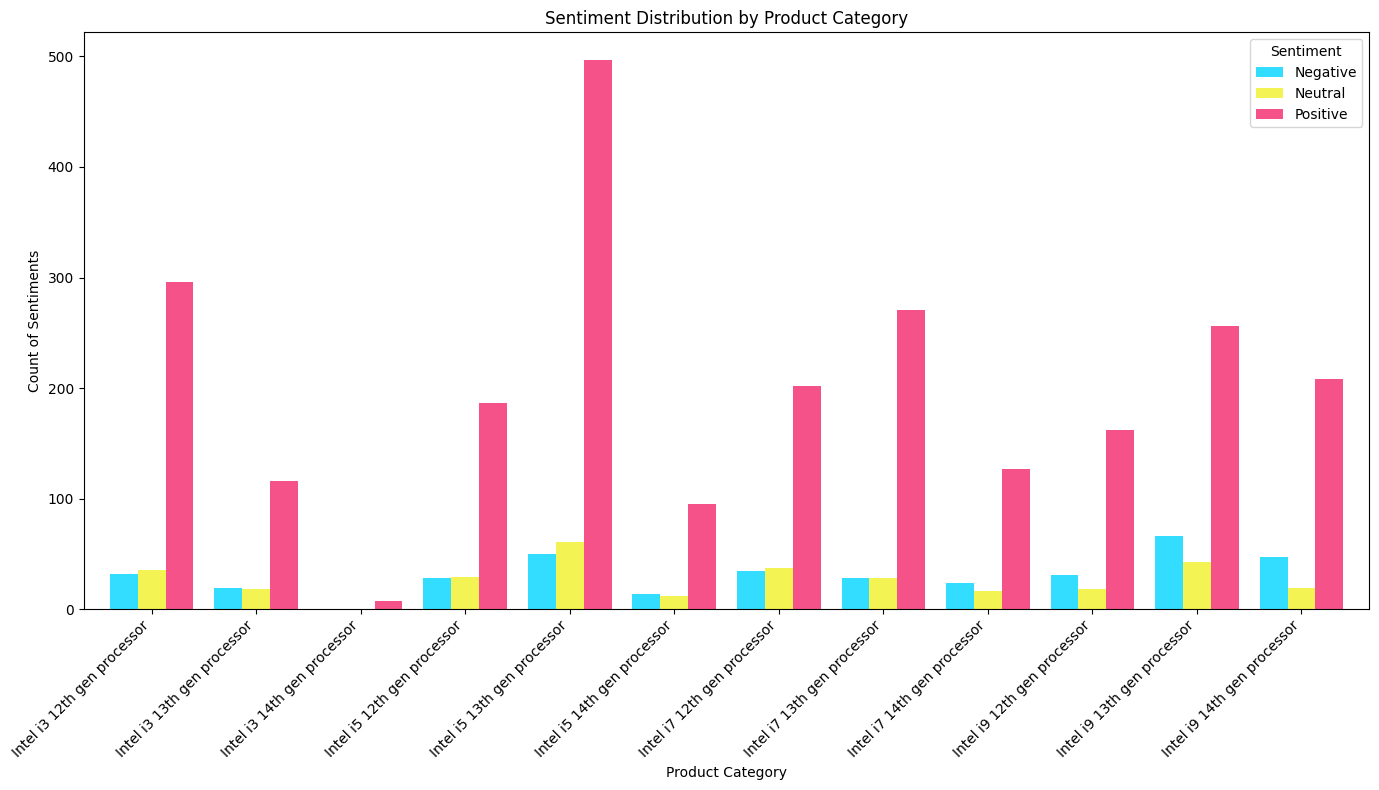

In [33]:
import matplotlib.pyplot as plt

# Assuming sentiment_counts is already created as per the previous steps

# Plotting the bar chart
custom_colors = ['#33DDFF','#F3F353','#F45288','#D06FE1']
sentiment_counts.plot(kind='bar', figsize=(14, 8), width=0.8, color=custom_colors)

# Adding title and labels
plt.title('Sentiment Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', loc='upper right')

# Display the chart
plt.tight_layout()
plt.show()

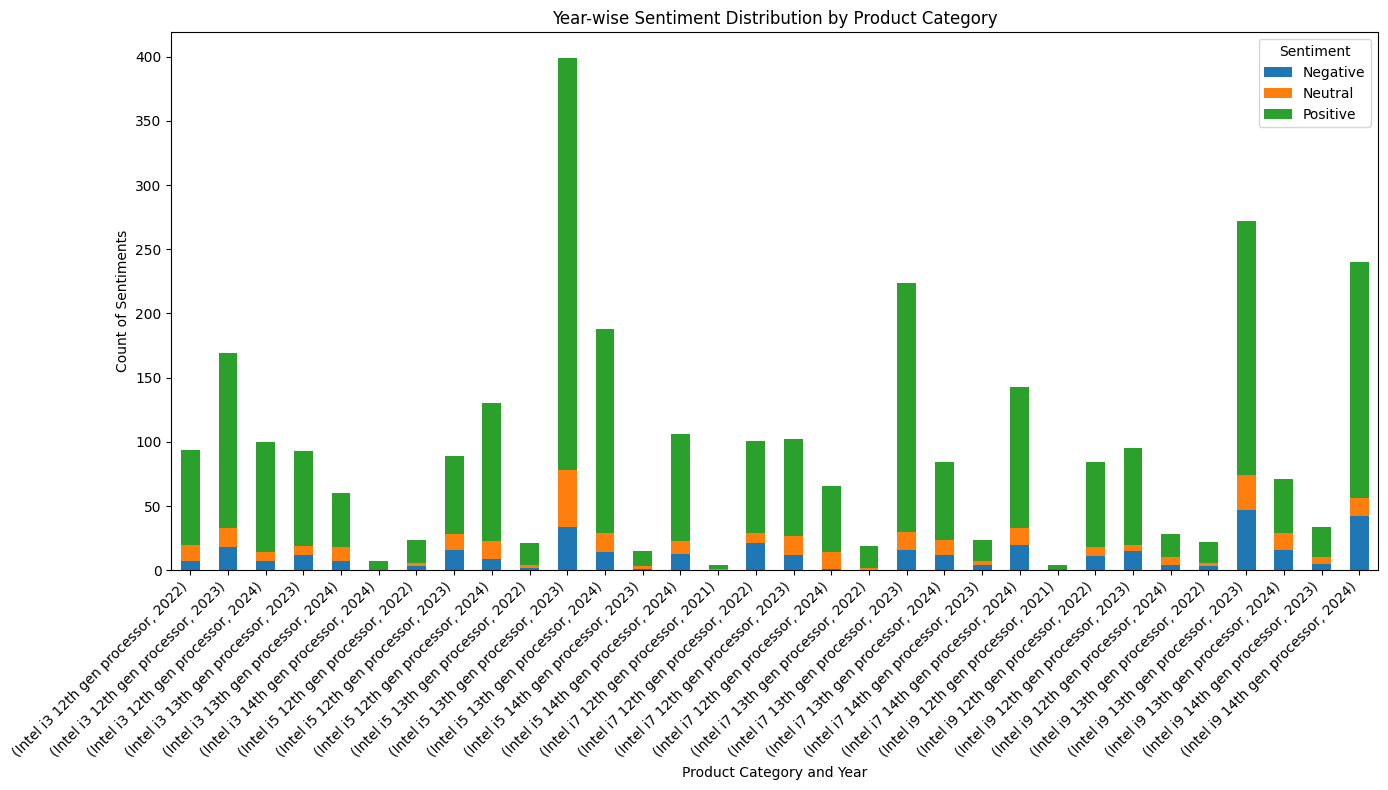

In [35]:
# Step 1: Extract the year from the review_date column
df_no_duplicates.loc[:, 'year'] = pd.to_datetime(df_no_duplicates['date']).dt.year

# Step 2: Group by category, year, and sentiment, then count the occurrences
sentiment_counts = df_no_duplicates.groupby(['category', 'year', 'sentiment']).size().unstack(fill_value=0)

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(14, 8))
sentiment_counts.plot(kind='bar', stacked=True, ax=ax)

# Adding title and labels
plt.title('Year-wise Sentiment Distribution by Product Category')
plt.xlabel('Product Category and Year')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', loc='upper right')

# Display the chart
plt.tight_layout()
plt.show()

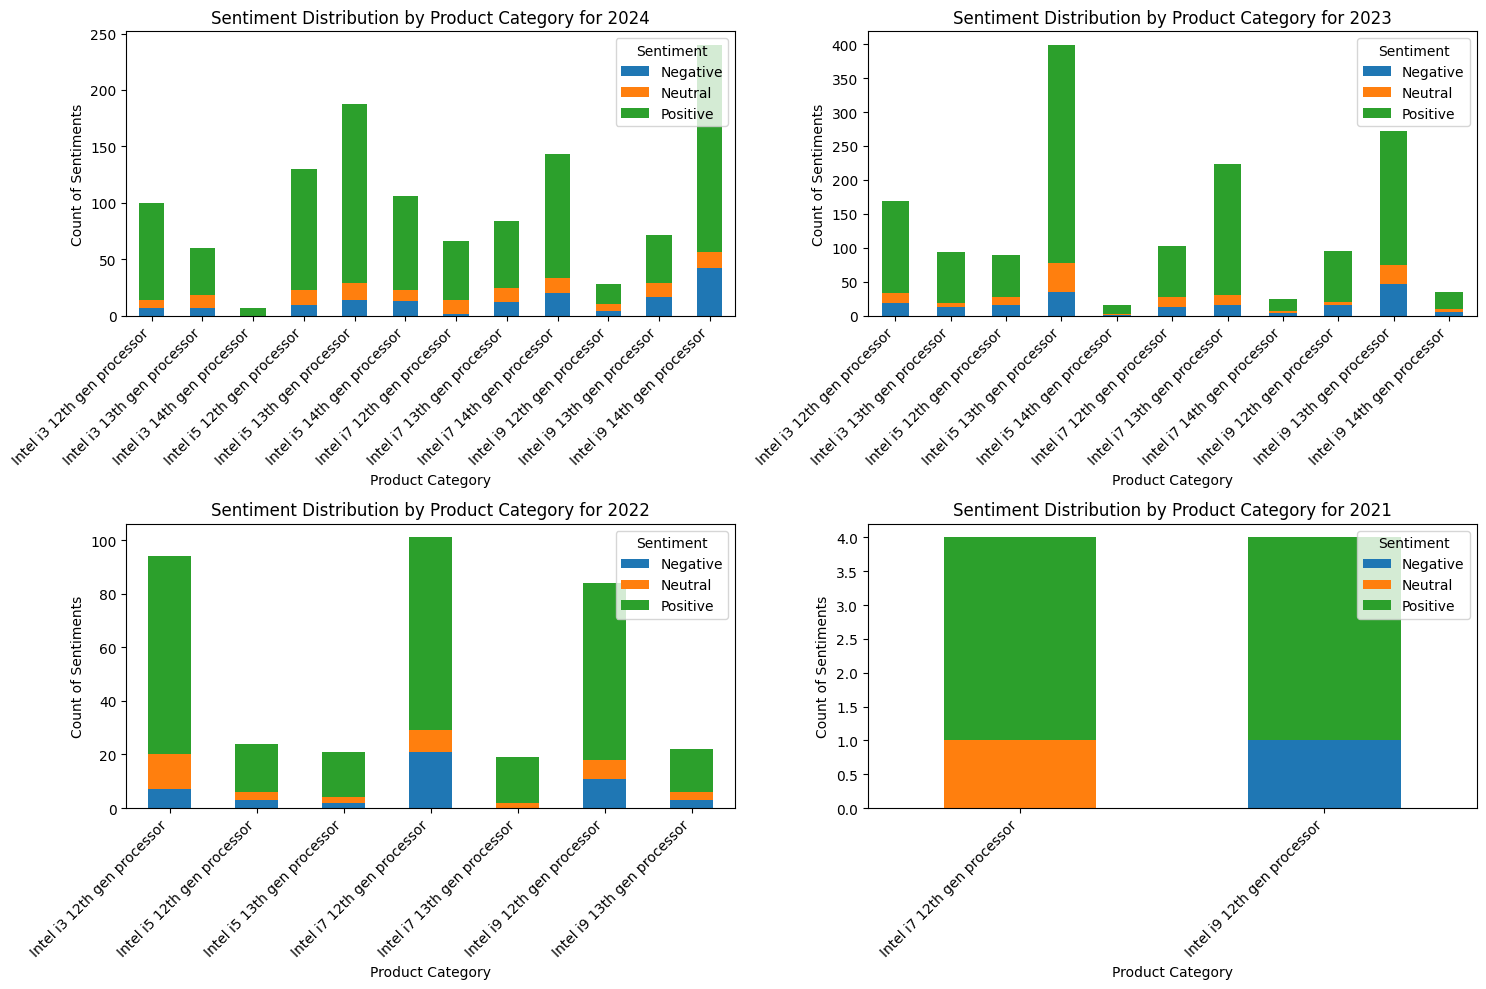

In [37]:
import matplotlib.pyplot as plt

# Get unique years
years = df_no_duplicates['year'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(nrows=(len(years) + 1) // 2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each year and create a plot
for idx, year in enumerate(years):
    # Filter data for the current year
    data_year = df_no_duplicates[df_no_duplicates['year'] == year]
    
    # Group by category and sentiment, then count occurrences
    sentiment_counts_year = data_year.groupby(['category', 'sentiment']).size().unstack(fill_value=0)
    
    # Plot the data
    sentiment_counts_year.plot(kind='bar', stacked=True, ax=axes[idx])
    
    # Adding title and labels
    axes[idx].set_title(f'Sentiment Distribution by Product Category for {year}')
    axes[idx].set_xlabel('Product Category')
    axes[idx].set_ylabel('Count of Sentiments')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    axes[idx].legend(title='Sentiment', loc='upper right')

# Remove any empty subplots if the number of years is odd
if len(years) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [38]:
# Calculate sentiment counts category-wise
sentiment_counts = df_no_duplicates.groupby(['category', 'sentiment']).size().unstack(fill_value=0)

# Calculate total reviews per category
total_reviews_per_category = sentiment_counts.sum(axis=1)

# Calculate customer satisfaction percentage per category
sentiment_counts['Customer Satisfaction Percentage'] = (sentiment_counts.get('Positive', 0) / total_reviews_per_category) * 100
sentiment_counts['Negative Reviews Percentage'] = (sentiment_counts.get('Negative', 0) / total_reviews_per_category) * 100

# Select only the relevant columns for display
result = sentiment_counts[['Customer Satisfaction Percentage', 'Negative Reviews Percentage']]

# Reset the index to include 'category' as a column
result_reset = result.reset_index()

# Rename the columns for better readability
result_reset.columns = ['Category', 'Customer Satisfaction Percentage', 'Negative Reviews Percentage']

# Style the DataFrame for better readability
styled_result = result_reset.style.format({
    'Customer Satisfaction Percentage': '{:.2f}%',
    'Negative Reviews Percentage': '{:.2f}%'
}).set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
     {'selector': 'td', 'props': [('font-size', '12pt'), ('text-align', 'center')]}]
).set_properties(**{'background-color': '#f4f4f4', 'color': 'black', 'border-color': 'black'})

# Display the styled DataFrame
display(styled_result)

,Category,Customer Satisfaction Percentage,Negative Reviews Percentage
0,Intel i3 12th gen processor,81.54%,8.82%
1,Intel i3 13th gen processor,75.82%,12.42%
2,Intel i3 14th gen processor,100.00%,0.00%
3,Intel i5 12th gen processor,76.54%,11.52%
4,Intel i5 13th gen processor,81.74%,8.22%
5,Intel i5 14th gen processor,78.51%,11.57%
6,Intel i7 12th gen processor,73.99%,12.45%
7,Intel i7 13th gen processor,82.87%,8.56%
8,Intel i7 14th gen processor,76.05%,14.37%
9,Intel i9 12th gen processor,76.78%,14.69%


In [39]:
print(sentiment_counts)

sentiment                    Negative  Neutral  Positive  \
category                                                   
Intel i3 12th gen processor        32       35       296   
Intel i3 13th gen processor        19       18       116   
Intel i3 14th gen processor         0        0         7   
Intel i5 12th gen processor        28       29       186   
Intel i5 13th gen processor        50       61       497   
Intel i5 14th gen processor        14       12        95   
Intel i7 12th gen processor        34       37       202   
Intel i7 13th gen processor        28       28       271   
Intel i7 14th gen processor        24       16       127   
Intel i9 12th gen processor        31       18       162   
Intel i9 13th gen processor        66       43       256   
Intel i9 14th gen processor        47       19       208   

sentiment                    Customer Satisfaction Percentage  \
category                                                        
Intel i3 12th gen processor  

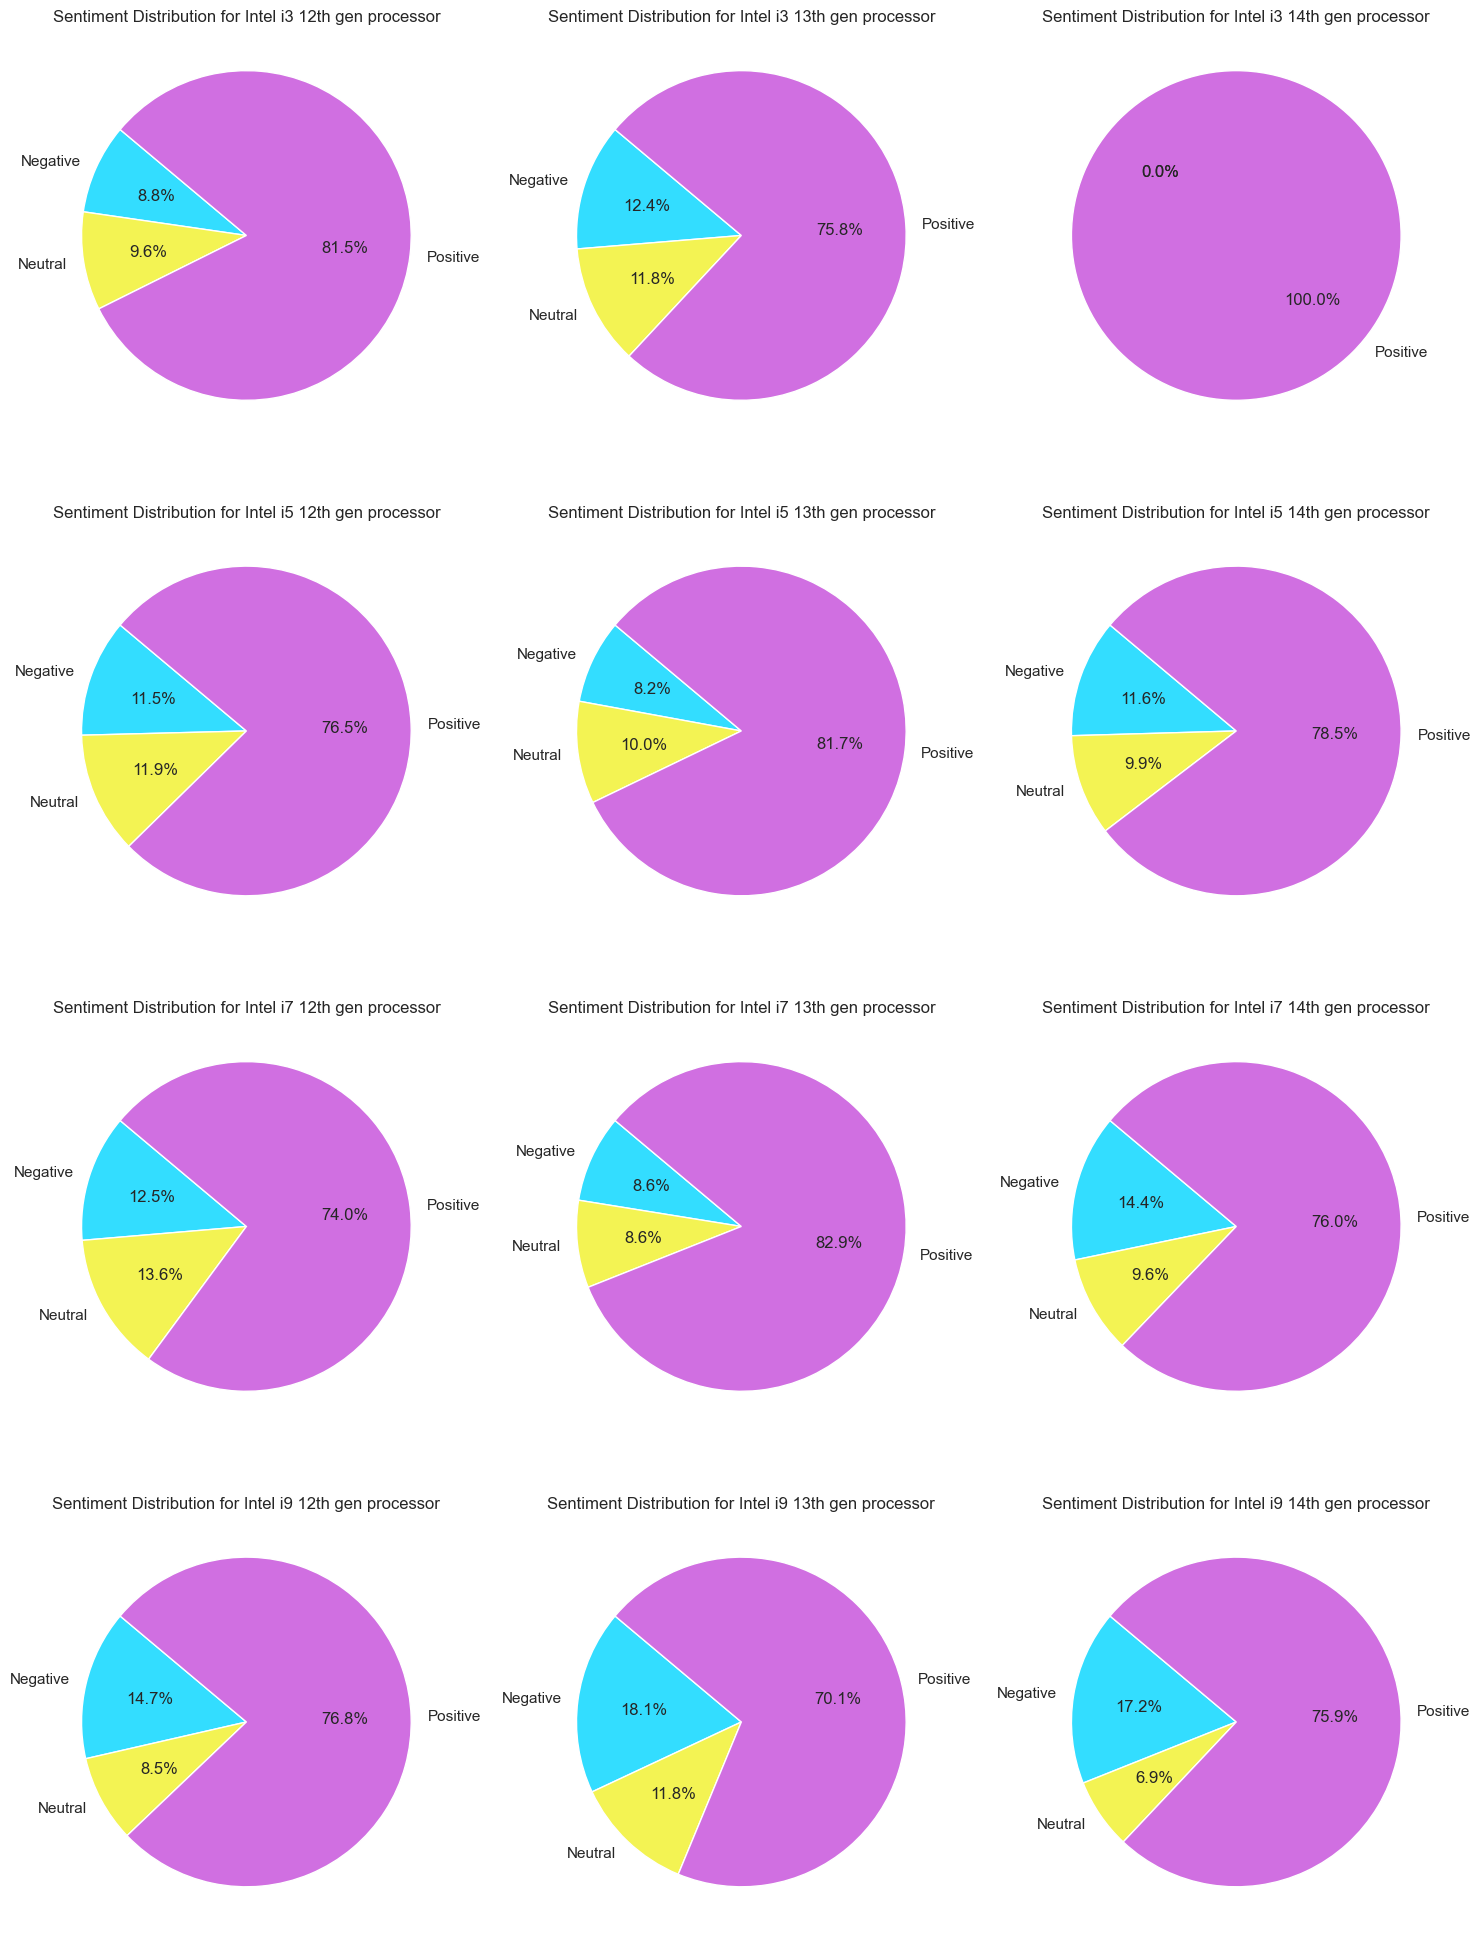

In [42]:
import matplotlib.pyplot as plt

# Group by 'category' and 'sentiment', then count the occurrences of each sentiment category
sentiment_counts = df_no_duplicates.groupby(['category', 'sentiment'])['sentiment'].count()

# Unstack the grouped DataFrame to pivot 'sentiment' into columns
sentiment_counts = sentiment_counts.unstack(level=-1, fill_value=0)

# Define the number of rows and columns for the subplot grid
num_categories = len(sentiment_counts.index)
num_cols = 3
num_rows = (num_categories // num_cols) + (1 if num_categories % num_cols != 0 else 0)

# Create a figure for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate pie charts for each category
for i, category in enumerate(sentiment_counts.index):
    sentiment_counts.loc[category].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#33DDFF', '#F3F353', '#D06FE1'], ax=axes[i])
    axes[i].set_title(f'Sentiment Distribution for {category}')
    axes[i].set_ylabel('')  # Hide y-label for better appearance

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


In [43]:
df_no_duplicates['country'].unique()

array(['India', 'Canada', 'France', 'Australia', 'Italy', 'Germany',
       'the United Kingdom', 'the United States', 'Spain', 'Belgium',
       'Brazil', 'the Netherlands', 'Singapore', 'Mexico', 'Japan',
       'Poland', 'Sweden'], dtype=object)

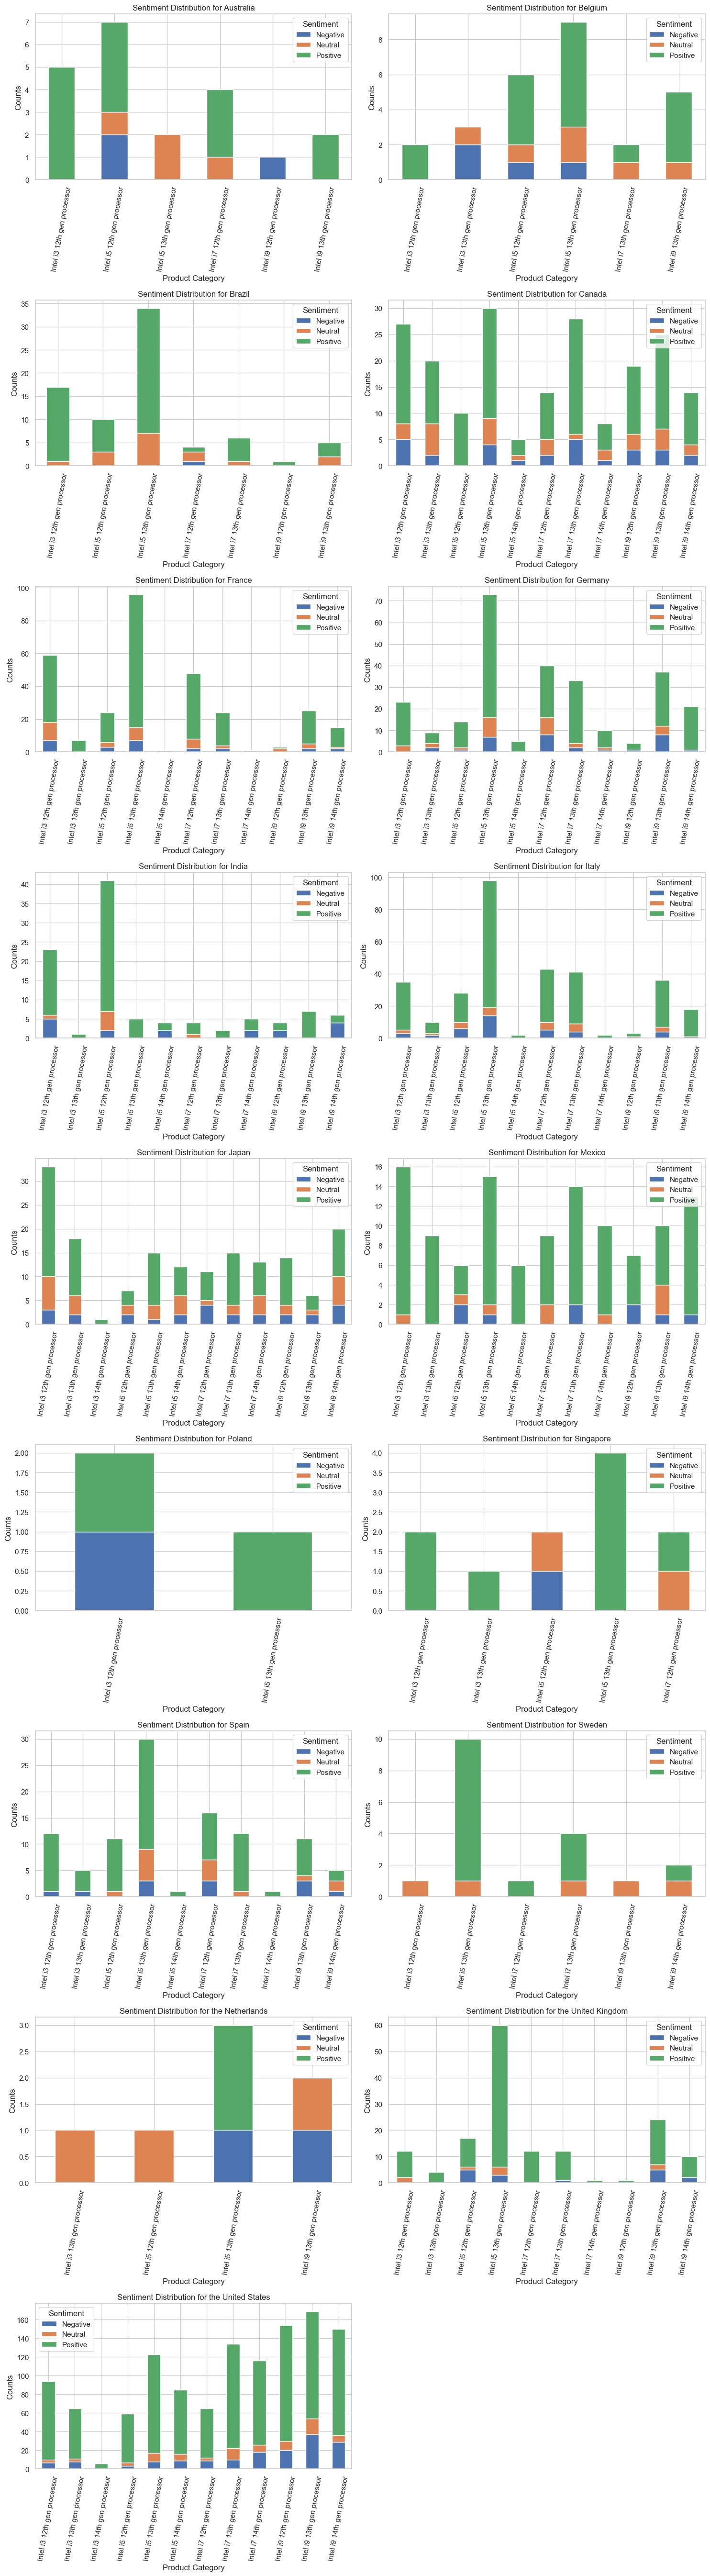

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_no_duplicates has the 'country', 'category', and 'sentiment' columns

# Group by 'country', 'category', and 'sentiment', then count the occurrences of each sentiment category
grouped_counts = df_no_duplicates.groupby(['country', 'category', 'sentiment']).size().reset_index(name='counts')

# Pivot the DataFrame for easier plotting
pivot_df = grouped_counts.pivot_table(index=['country', 'category'], columns='sentiment', values='counts', fill_value=0)

# Reset the index for easier plotting
pivot_df = pivot_df.reset_index()

# Get the list of unique countries
countries = pivot_df['country'].unique()
sentiments = ['Negative', 'Neutral', 'Positive']

# Define the number of rows and columns for the subplot grid
num_countries = len(countries)
num_cols = 2
num_rows = (num_countries // num_cols) + (1 if num_countries % num_cols != 0 else 0)

# Create a figure for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate stacked bar charts for each country
for i, country in enumerate(countries):
    country_data = pivot_df[pivot_df['country'] == country].set_index('category')
    
    # Plot the data for the current country
    country_data[sentiments].plot(kind='bar', stacked=True, ax=axes[i], title=f'Sentiment Distribution for {country}')
    axes[i].set_ylabel('Counts')
    axes[i].set_xlabel('Product Category')
    axes[i].tick_params(axis='x', rotation=80)

    # Add legend
    axes[i].legend(title='Sentiment')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


In [45]:
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to extract aspects from review text
def extract_aspects(review_text):
    doc = nlp(review_text)
    aspects = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN'] or token.dep_ in ['amod', 'compound']]
    return aspects

# Function to classify sentiment of an aspect
def classify_sentiment(aspect):
    score = analyzer.polarity_scores(aspect)
    sentiment_score = score['compound']
    if sentiment_score >= 0.05:
        return 'Positive'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def process_reviews(df):
    df = df.copy()  # Make a copy of the DataFrame to avoid modifying the original DataFrame
    df.loc[:, 'aspect'] = df['review_text'].apply(extract_aspects)
    df.loc[:, 'aspect_sentiment'] = df['aspect'].apply(lambda aspects: [classify_sentiment(aspect) for aspect in aspects])
    return df

df_aspects = process_reviews(df_no_duplicates)

print(df_aspects)

       customer_name  rating  \
0               ARUN     5.0   
1              Ayush     5.0   
2             Hruaia     5.0   
3            Yavvari     4.0   
4            Mr.GeAr     5.0   
...              ...     ...   
3646        Jimcar81     5.0   
3653  Rolando Garcia     5.0   
3666    Amazon カスタマー     4.0   
3672           ヴォルク半     5.0   
3746      Hugo Audet     2.0   

                                            review_text  \
0     the processor was very power efficient i devel...   
1     try to get it under k and check the rankings i...   
2     i upgrade from f the performance gain is a hug...   
3     this will not work without graphic card so be ...   
4     best gaming and multitasking processor at the ...   
...                                                 ...   
3646  the processor has been working for more than m...   
3653  you will have more fps in most games than with...   
3666  i didnt play games on my pc so i decided to us...   
3672  i wanted to make i 

In [46]:
# Step 1: Count the frequency of each aspect
aspect_counts = df_aspects['aspect'].explode().value_counts()

# Step 2: Define a function to get the most frequent aspect for each row
def get_most_frequent_aspect(row):
    aspects = row['aspect']
    if aspects:
        return max(aspects, key=lambda aspect: aspect_counts.get(aspect, 0))
    else:
        return None

# Step 3: Apply the function to create the 'keyfeature' column
df_aspects.loc[:, 'keyfeature'] = df_aspects.apply(get_most_frequent_aspect, axis=1)

# Display the DataFrame with the new column
print(df_aspects)

       customer_name  rating  \
0               ARUN     5.0   
1              Ayush     5.0   
2             Hruaia     5.0   
3            Yavvari     4.0   
4            Mr.GeAr     5.0   
...              ...     ...   
3646        Jimcar81     5.0   
3653  Rolando Garcia     5.0   
3666    Amazon カスタマー     4.0   
3672           ヴォルク半     5.0   
3746      Hugo Audet     2.0   

                                            review_text  \
0     the processor was very power efficient i devel...   
1     try to get it under k and check the rankings i...   
2     i upgrade from f the performance gain is a hug...   
3     this will not work without graphic card so be ...   
4     best gaming and multitasking processor at the ...   
...                                                 ...   
3646  the processor has been working for more than m...   
3653  you will have more fps in most games than with...   
3666  i didnt play games on my pc so i decided to us...   
3672  i wanted to make i 

In [52]:
import pandas as pd
from IPython.display import display, HTML

# Assuming filtered_keyfeature_counts is already computed
negative_keyfeatures = df_aspects[df_aspects['sentiment'] == 'Negative']['keyfeature']
keyfeature_counts = negative_keyfeatures.value_counts()
filtered_keyfeature_counts = keyfeature_counts[keyfeature_counts > 10]

# Calculate the percentage of each key feature
total_negative_reviews = keyfeature_counts.sum()
filtered_keyfeature_percentages = (filtered_keyfeature_counts / total_negative_reviews) * 100

# Create a DataFrame for better display
result_df = pd.DataFrame({
    'Key Feature': filtered_keyfeature_counts.index,
    'Count': filtered_keyfeature_counts.values,
    'Percentage': filtered_keyfeature_percentages.values
})

# Set the 'Key Feature' as the index for display
result_df.set_index('Key Feature', inplace=True)
display(HTML("<h4>Improvements needed for the features :</h4>"))
display(HTML(result_df.to_html()))


,Count,Percentage
Key Feature,,
cpu,121,32.614555
processor,72,19.407008
performance,27,7.277628
k,23,6.199461


In [53]:
import pandas as pd

# Assuming filtered_keyfeature_counts for positive sentiment is already computed
positive_keyfeatures = df_aspects[df_aspects['sentiment'] == 'Positive']['keyfeature']
keyfeature_counts = positive_keyfeatures.value_counts()
filtered_keyfeature_counts = keyfeature_counts[keyfeature_counts > 10]

# Calculate the percentage of each key feature
total_positive_reviews = keyfeature_counts.sum()
filtered_keyfeature_percentages = (filtered_keyfeature_counts / total_positive_reviews) * 100

# Create a DataFrame for better display
result_df = pd.DataFrame({
    'Key Feature': filtered_keyfeature_counts.index,
    'Count': filtered_keyfeature_counts.values,
    'Percentage': filtered_keyfeature_percentages.values
})

# Set the 'Key Feature' as the index for display
result_df.set_index('Key Feature', inplace=True)

# Rename columns to match the previous format
result_df.rename(columns={'Count': 'Frequency', 'Percentage': 'Percentage (%)'}, inplace=True)
result_df['Percentage (%)'] = result_df['Percentage (%)'].map(lambda x: f'{x:.2f}%')

# If you want to render it nicely in a notebook or a script that supports HTML rendering
display(HTML("<h4>Keyfeature strengths :</h4>"))
display(HTML(result_df.to_html()))


,Frequency,Percentage (%)
Key Feature,,
cpu,696,30.06%
processor,533,23.02%
performance,175,7.56%
good,117,5.05%
k,79,3.41%
intel,65,2.81%
gaming,63,2.72%
price,60,2.59%
product,36,1.56%


In [54]:
df_aspects.to_csv('cleaned_reviews.csv', index=False)

In [55]:
def save_to_csv(reviews, filename='reviews.csv'):
    df = pd.DataFrame(reviews)
    if os.path.isfile(filename):
        df.to_csv(filename, mode='a', header=False, index=False)
    else:
        df.to_csv(filename, index=False)

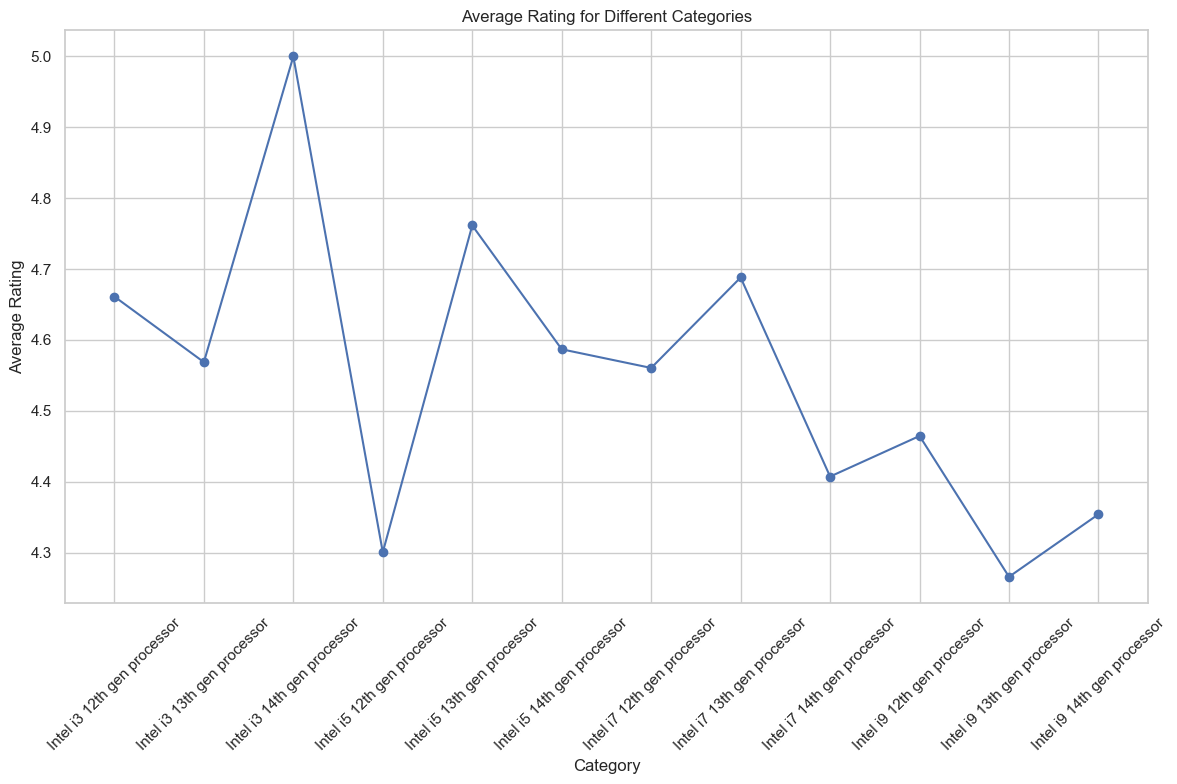

In [56]:
import matplotlib.pyplot as plt

# Calculate average rating for each category
average_ratings = df_aspects.groupby('category')['rating'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(average_ratings['category'], average_ratings['rating'], marker='o', linestyle='-')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating for Different Categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Show grid
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

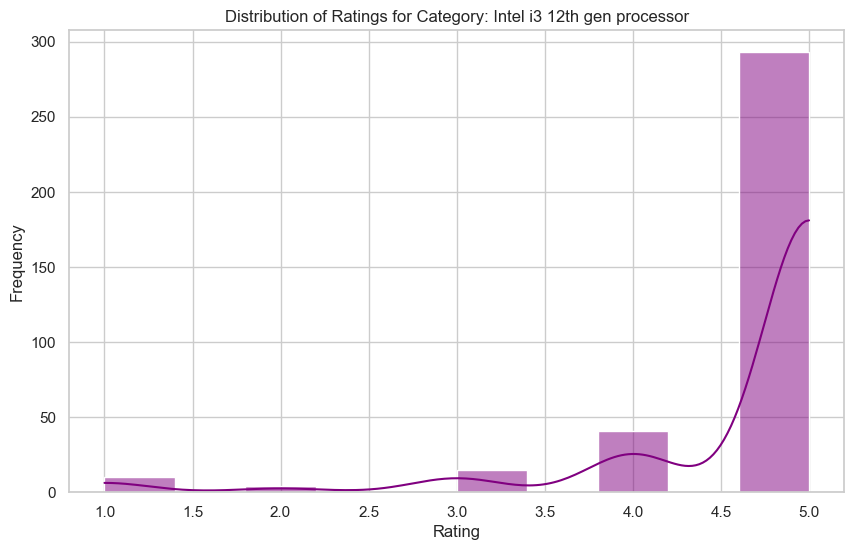

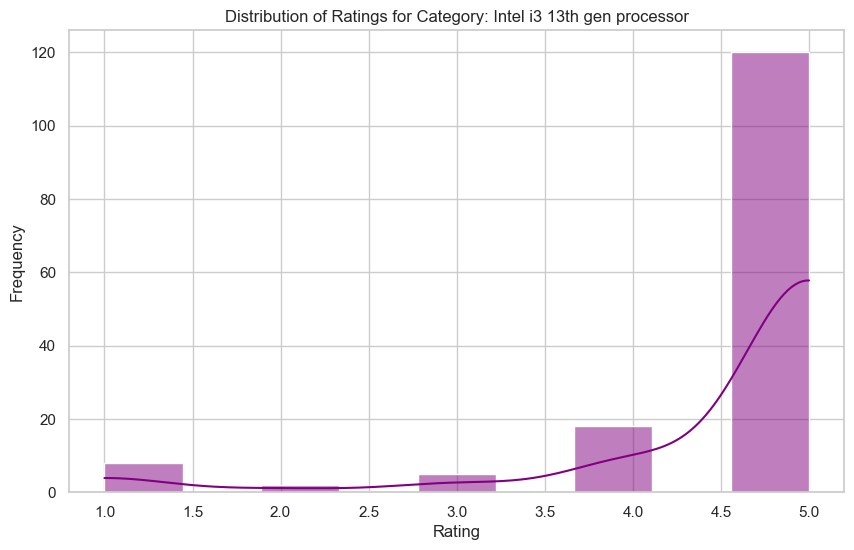

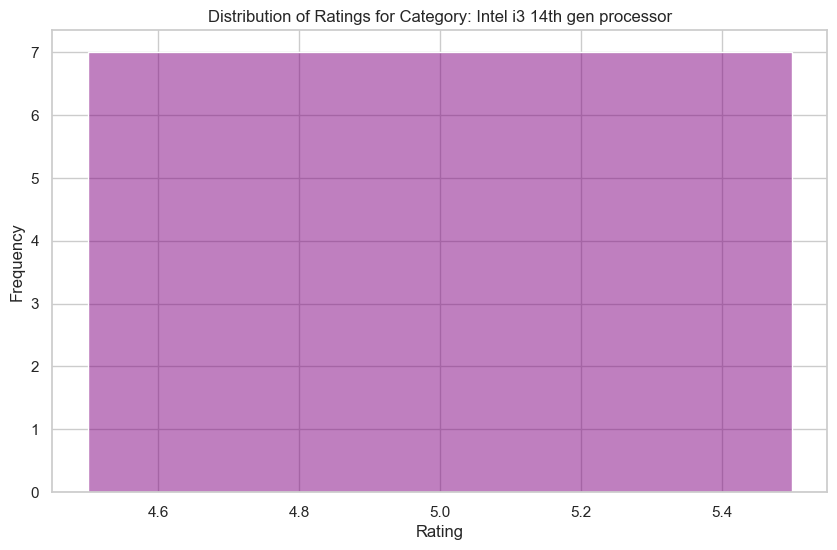

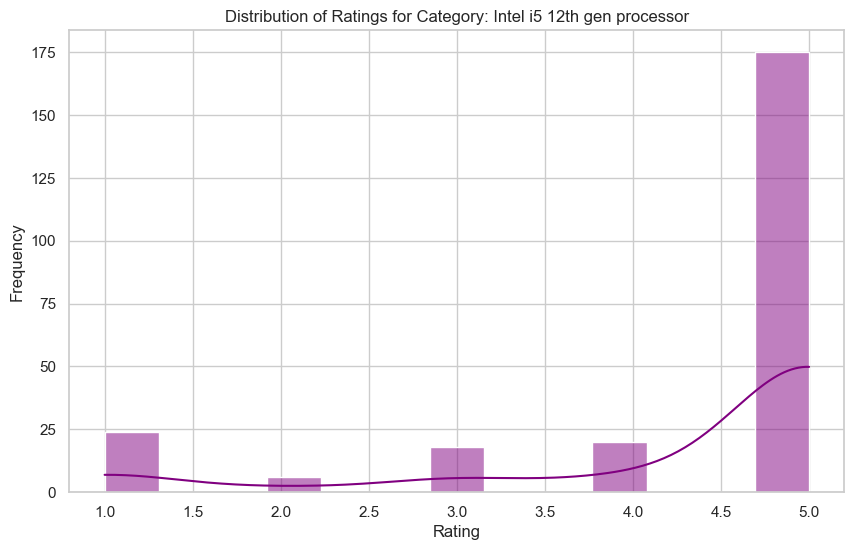

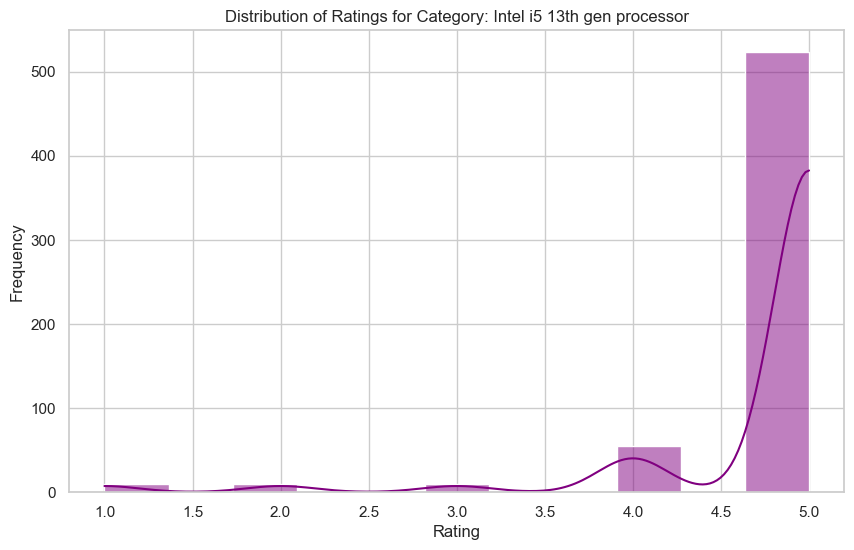

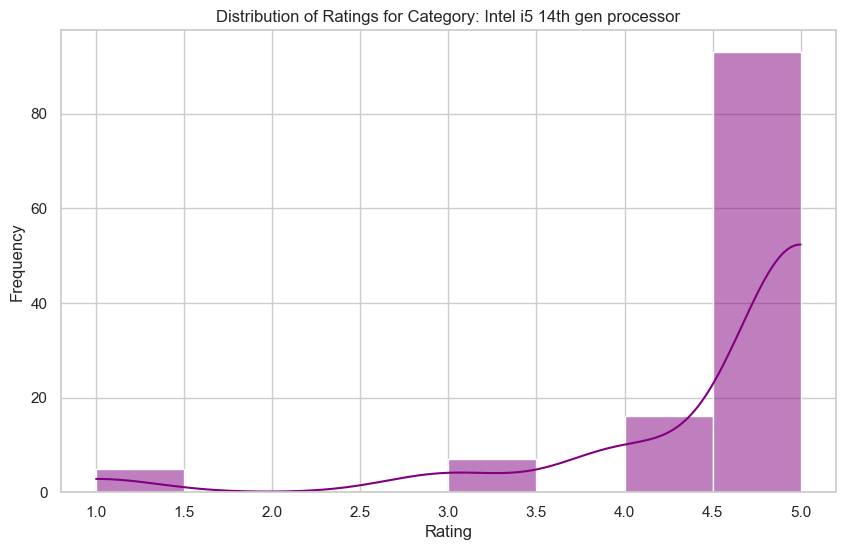

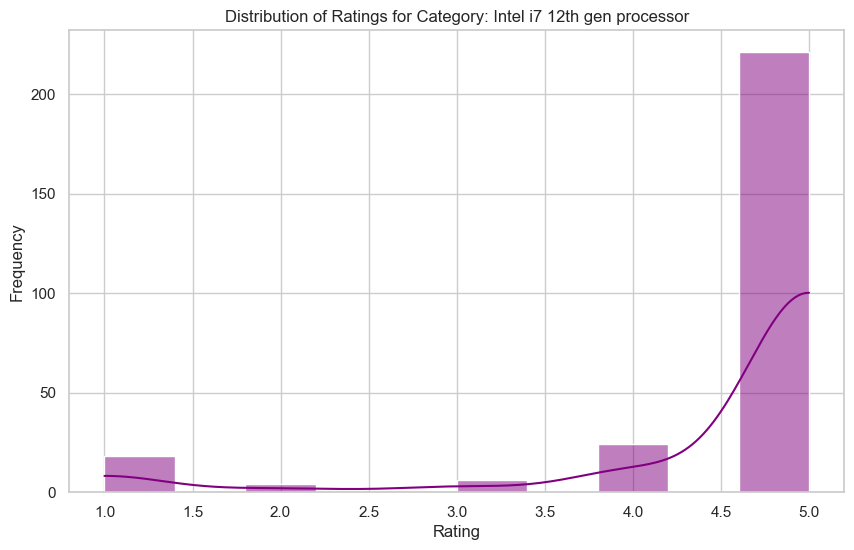

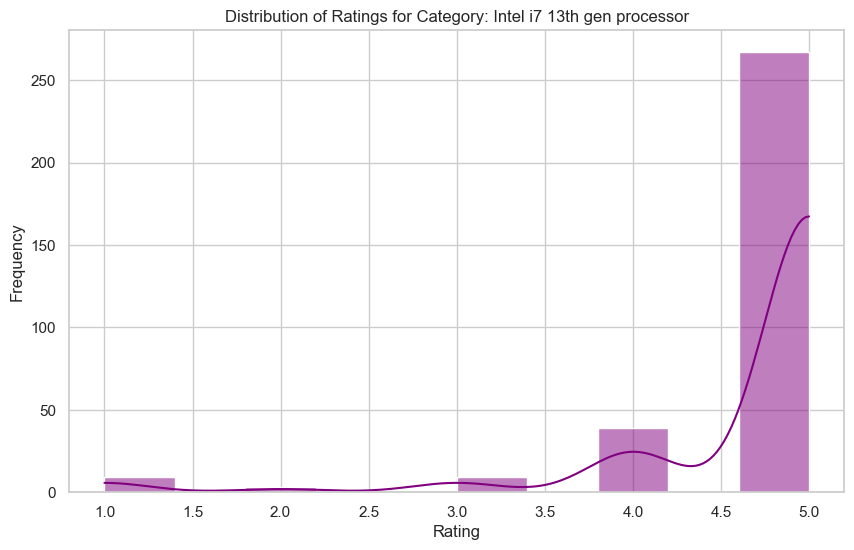

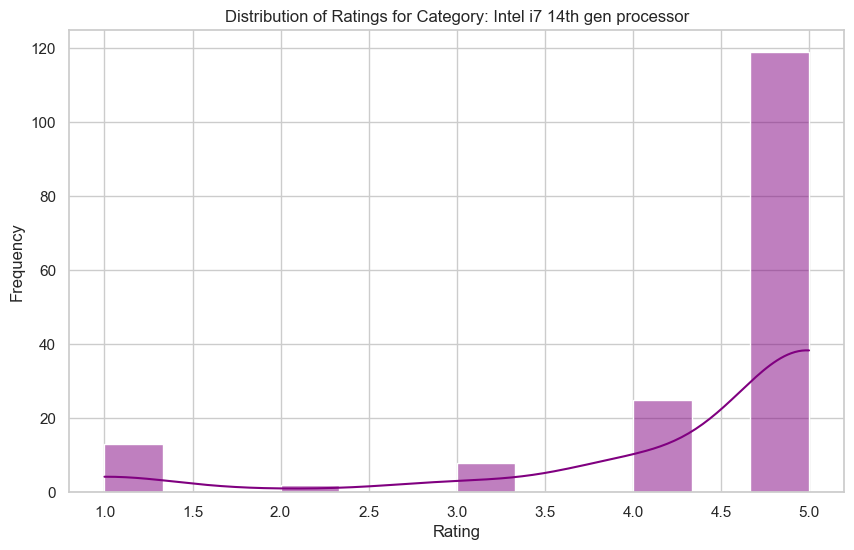

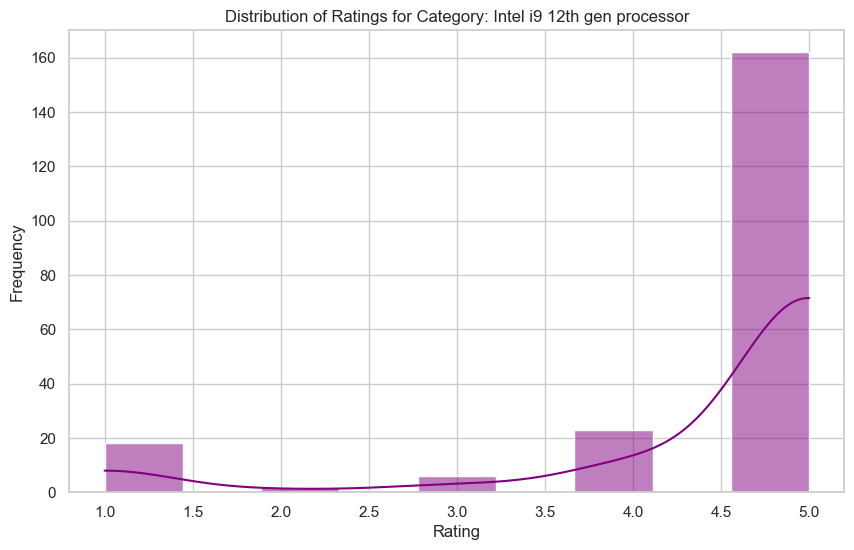

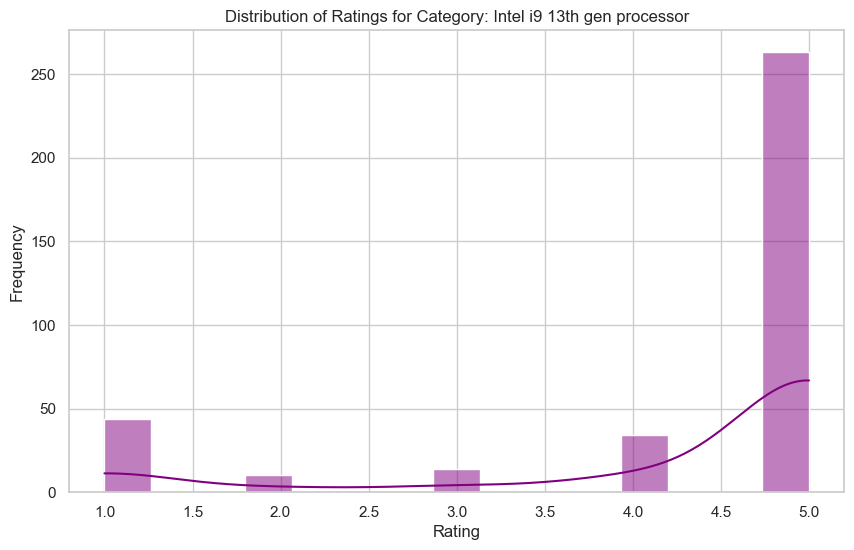

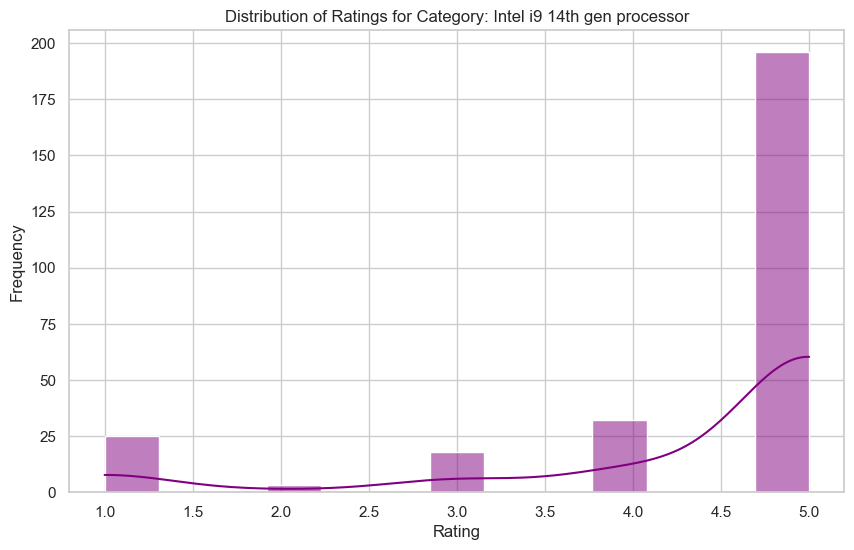

In [57]:
# Iterate over unique categories and create separate charts
for category, data in df_aspects.groupby('category'):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['rating'], kde=True, color='purple')
    plt.title(f'Distribution of Ratings for Category: {category}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

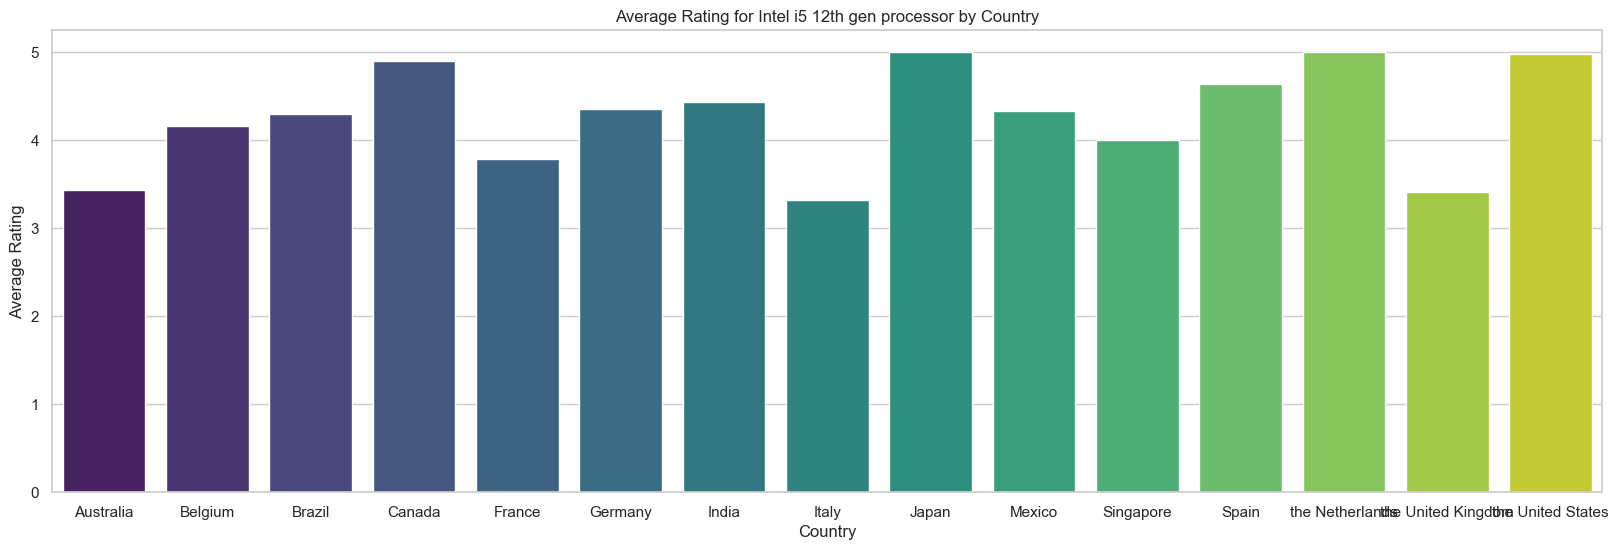

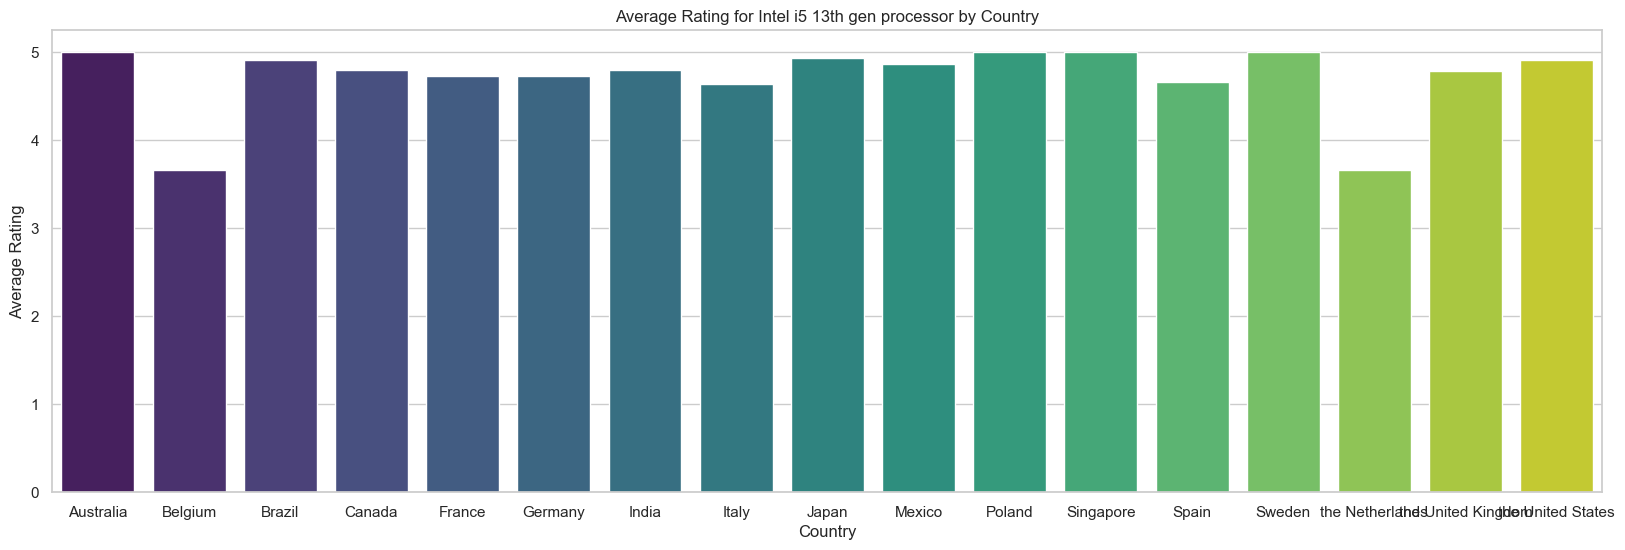

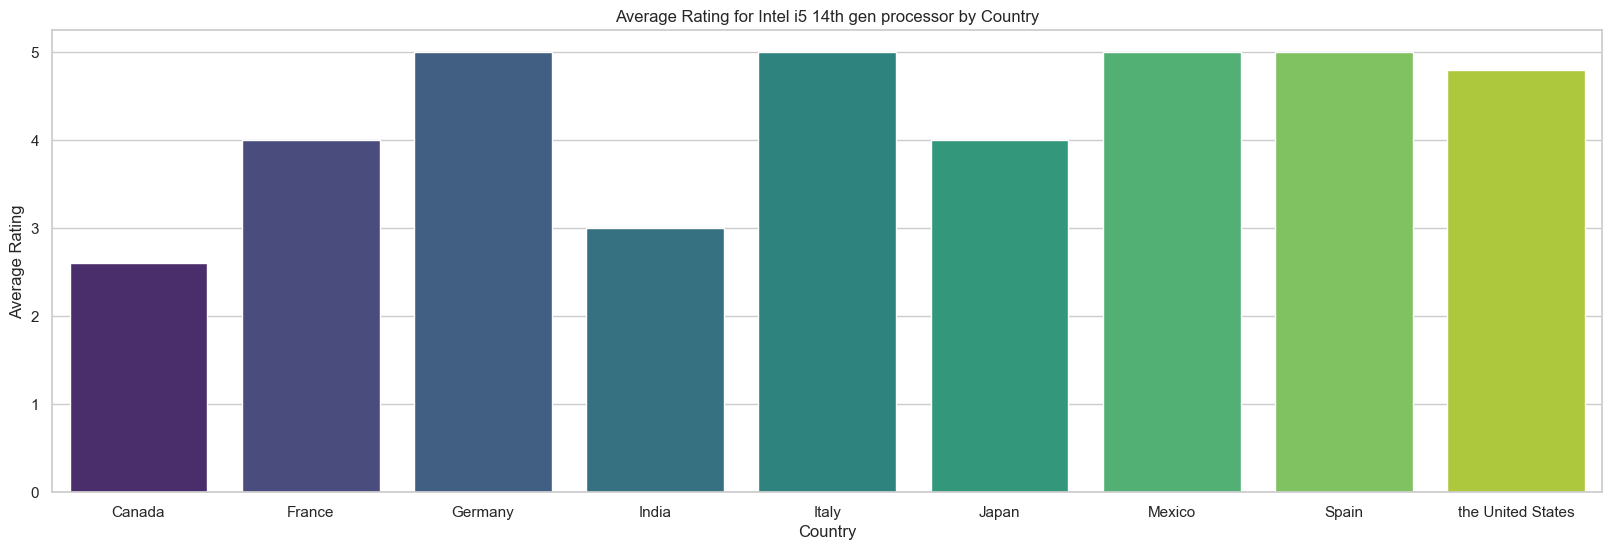

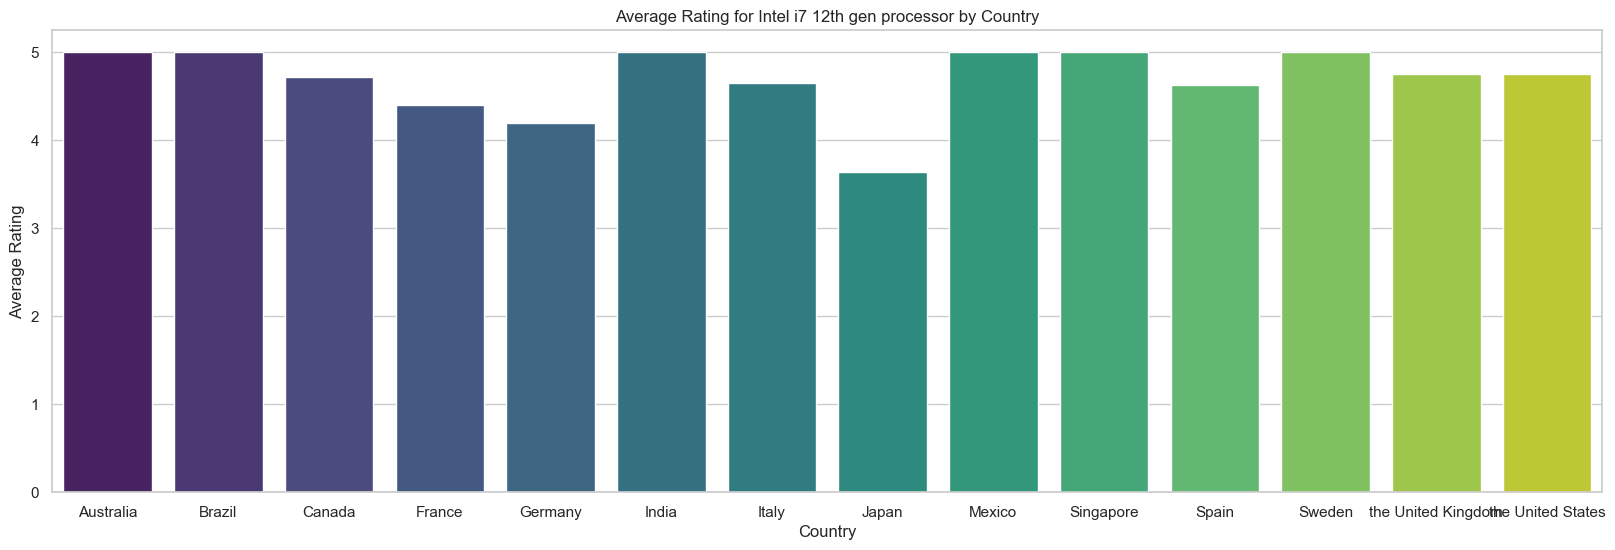

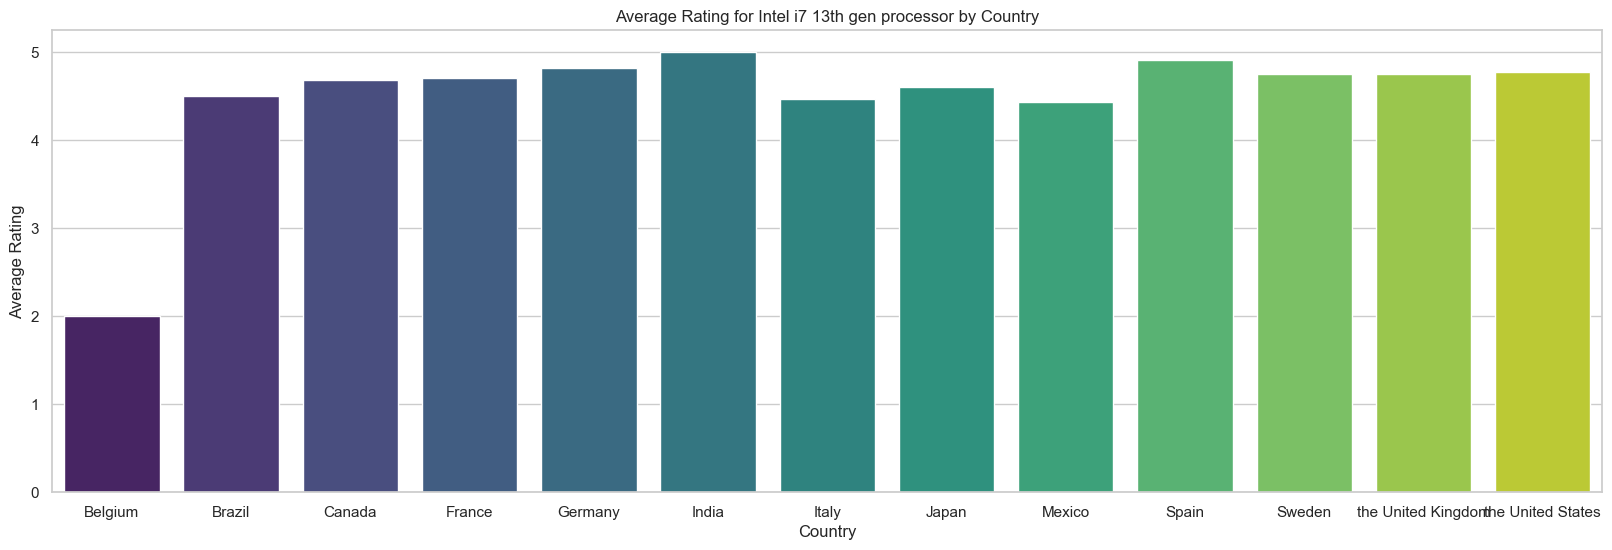

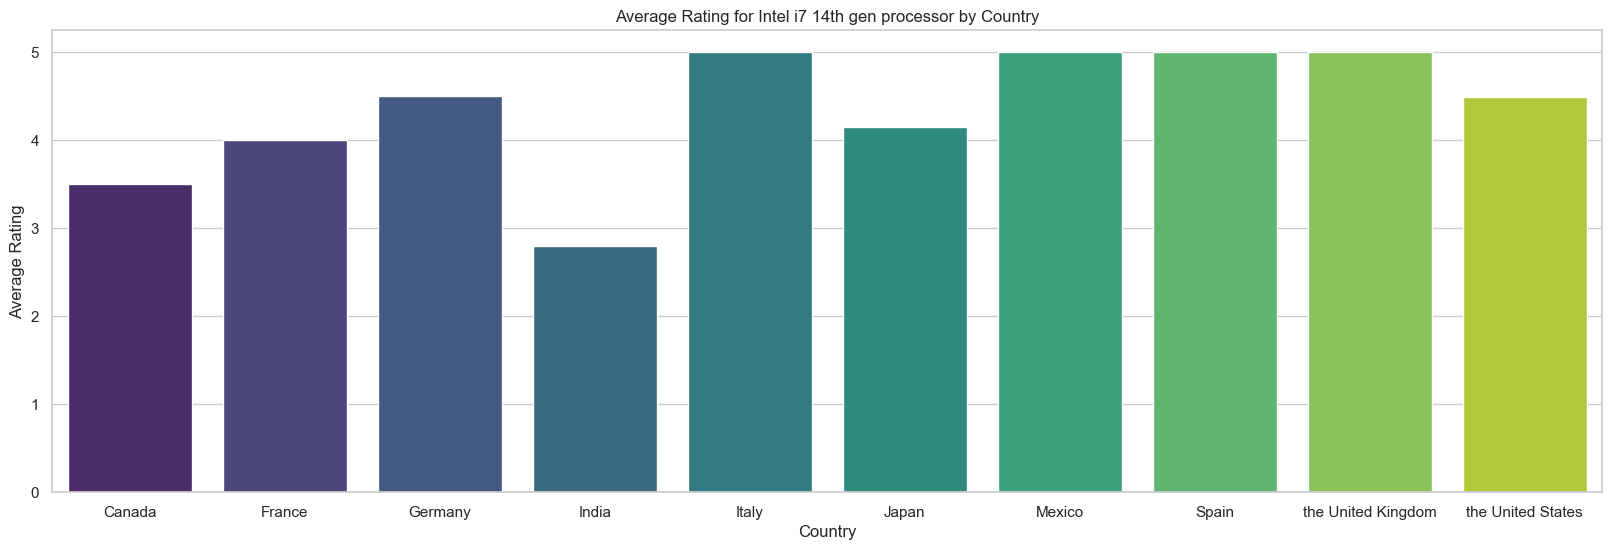

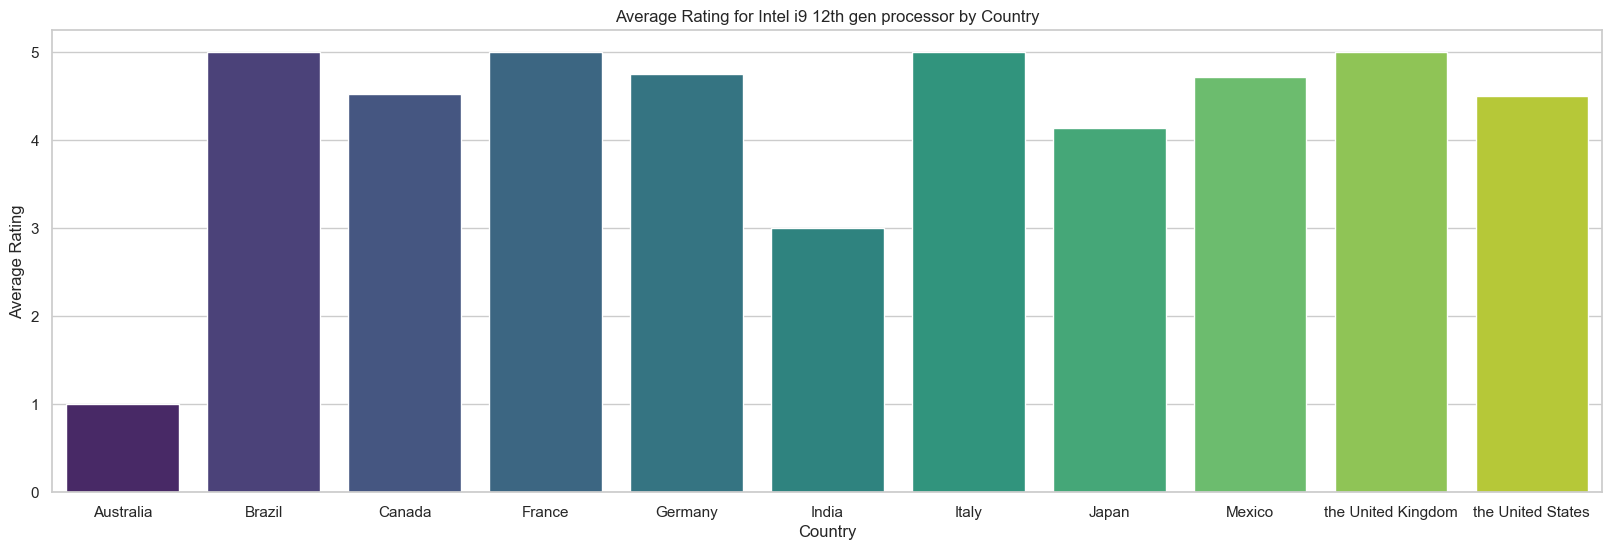

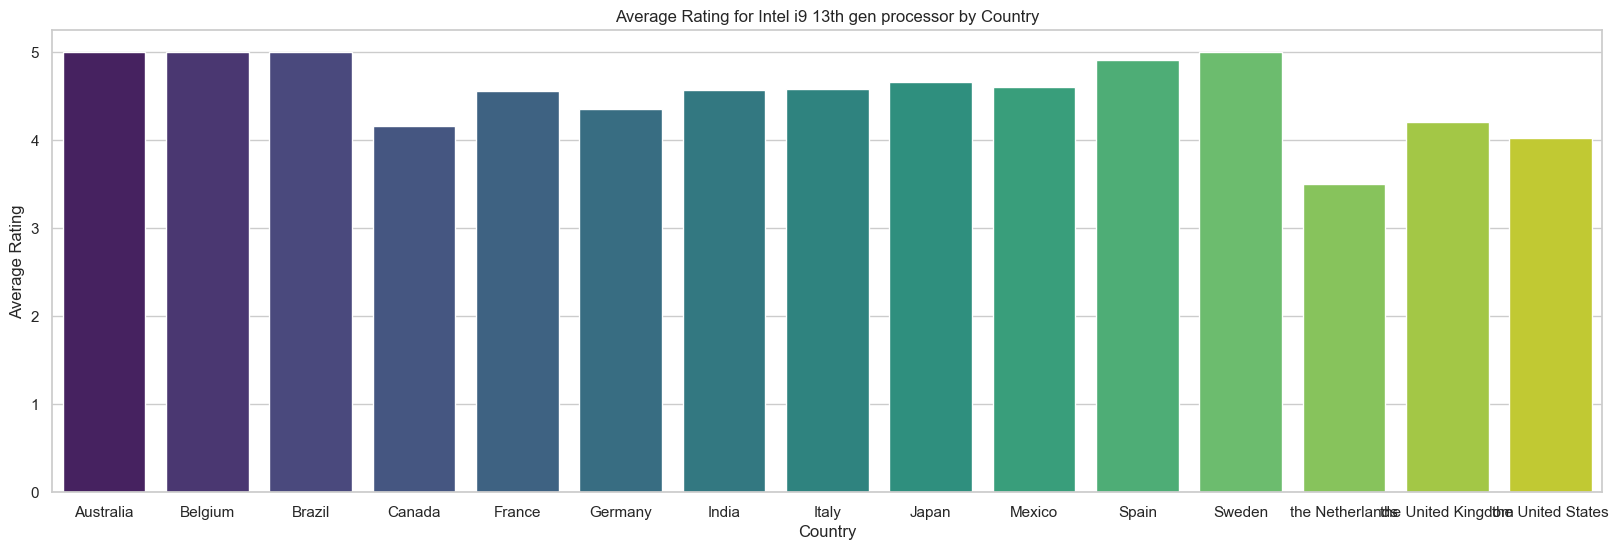

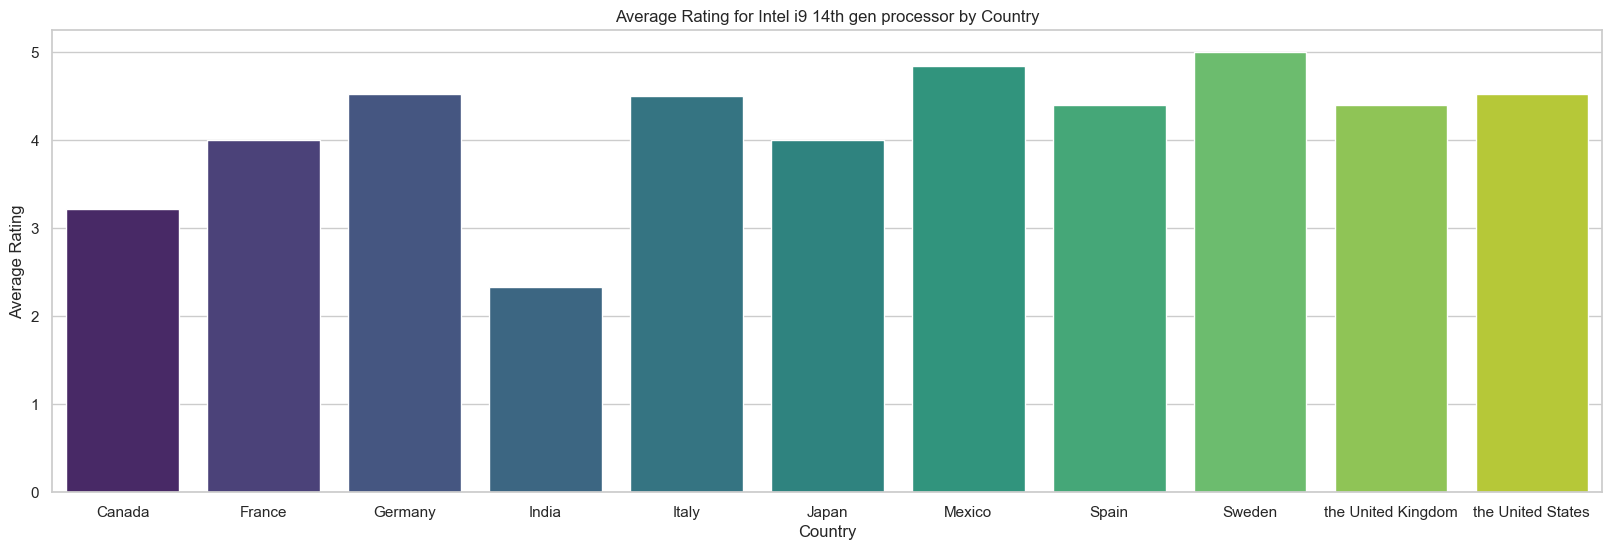

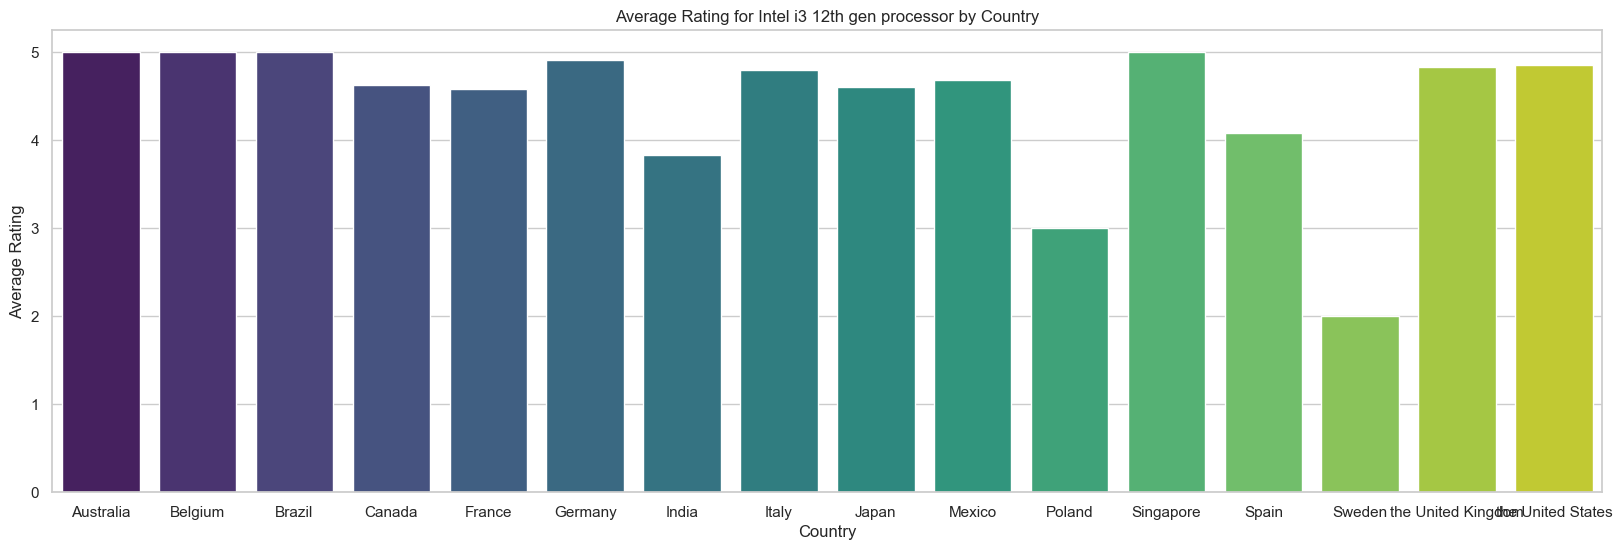

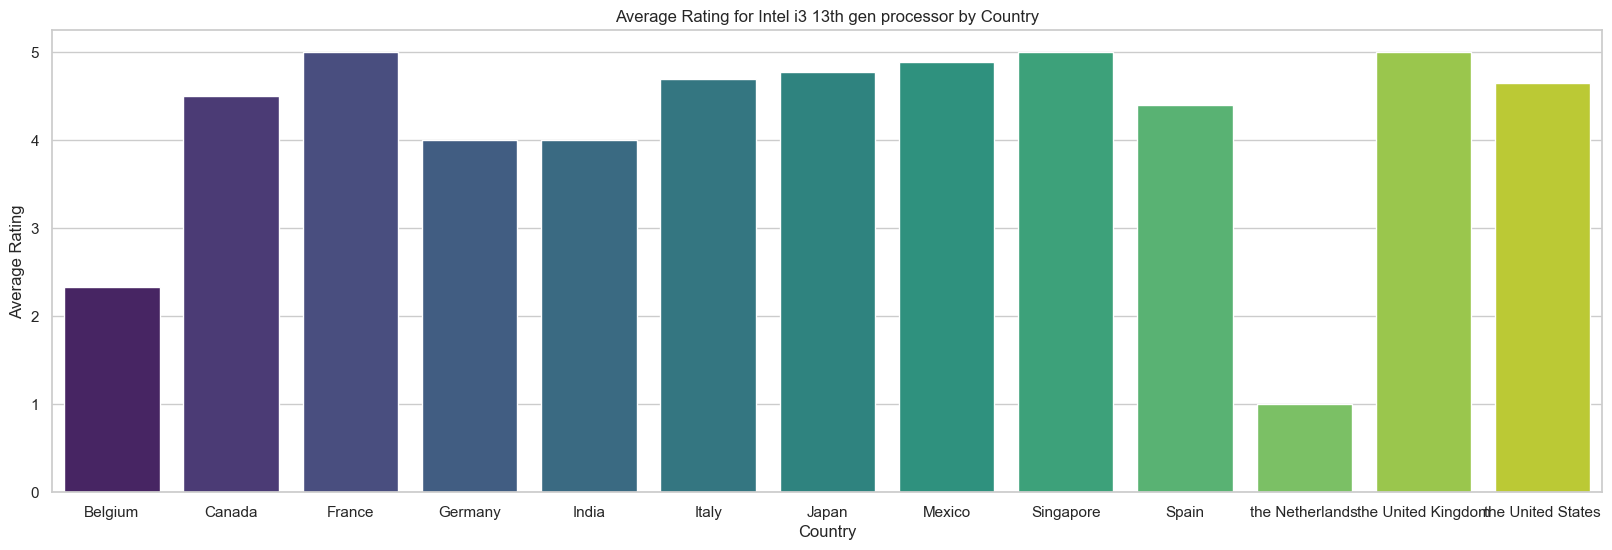

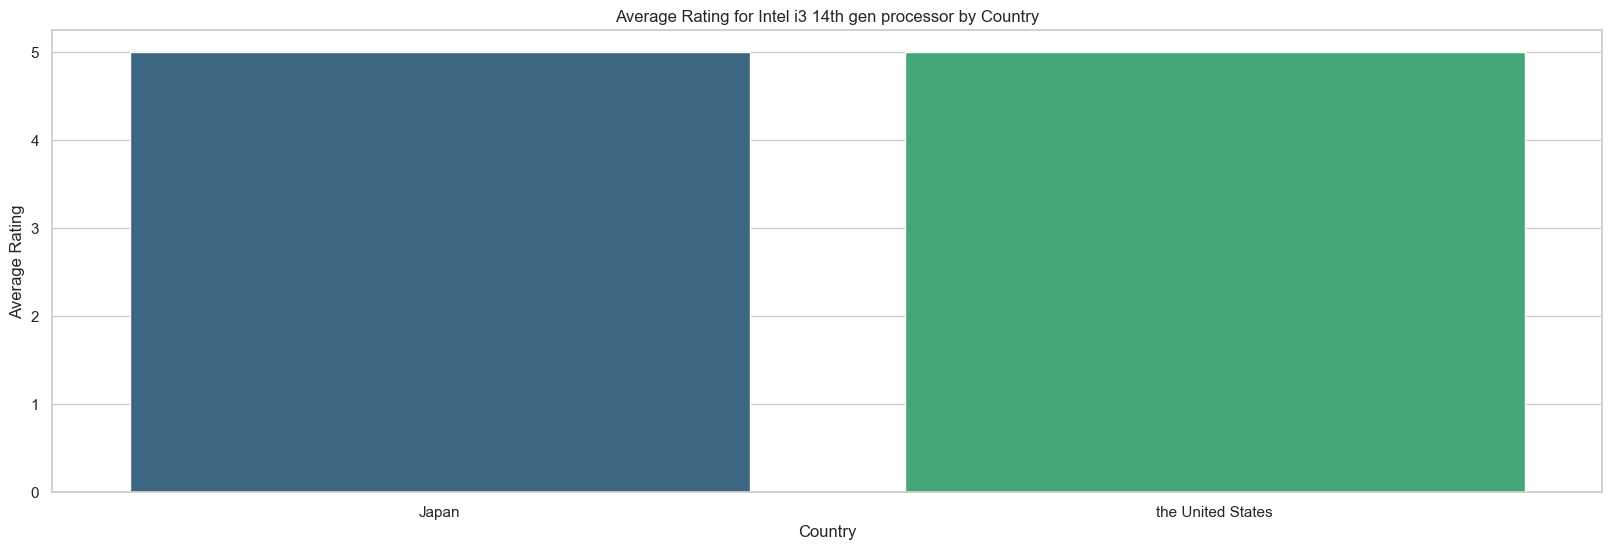

In [58]:
# Convert 'date' to datetime format
df_aspects['date'] = pd.to_datetime(df_aspects['date'], format='%d/%m/%Y')

# Convert 'rating' to numeric
df_aspects['rating'] = pd.to_numeric(df_aspects['rating'])

# Get unique categories
categories = df_aspects['category'].unique()

# Plotting separate bar charts for each category
for category in categories:
    category_df = df_aspects[df_aspects['category'] == category]
    average_ratings = category_df.groupby('country').rating.mean().reset_index()
    
    plt.figure(figsize=(20, 6))
    sns.barplot(x='country', y='rating', data=average_ratings, palette='viridis', hue='country', legend=False)
    plt.xlabel('Country')
    plt.ylabel('Average Rating')
    plt.title(f'Average Rating for {category} by Country')
    plt.show()

In [59]:
df_aspects.head()

,customer_name,rating,review_text,product_name,date,country,sentiment,category,year,aspect,aspect_sentiment,keyfeature
0,ARUN,5.0,the processor was very power efficient i devel...,Intel Core I5 12400F 12 Gen Generation Desktop...,2024-04-24,India,Positive,Intel i5 12th gen processor,2024,"[processor, power, android, apps, web, develop...","[Neutral, Neutral, Neutral, Neutral, Neutral, ...",processor
1,Ayush,5.0,try to get it under k and check the rankings i...,Intel Core I5 12400F 12 Gen Generation Desktop...,2024-05-14,India,Neutral,Intel i5 12th gen processor,2024,"[k, rankings, details, sections]","[Neutral, Neutral, Neutral, Neutral]",k
2,Hruaia,5.0,i upgrade from f the performance gain is a hug...,Intel Core I5 12400F 12 Gen Generation Desktop...,2024-03-24,India,Positive,Intel i5 12th gen processor,2024,"[f, performance, gain, cooler, master, hyper, ...","[Neutral, Neutral, Positive, Neutral, Neutral,...",cpu
3,Yavvari,4.0,this will not work without graphic card so be ...,Intel Core I5 12400F 12 Gen Generation Desktop...,2024-02-18,India,Positive,Intel i5 12th gen processor,2024,"[graphic, card]","[Neutral, Neutral]",card
4,Mr.GeAr,5.0,best gaming and multitasking processor at the ...,Intel Core I5 12400F 12 Gen Generation Desktop...,2024-04-07,India,Positive,Intel i5 12th gen processor,2024,"[gaming, processor, price, k, budget, pc, k]","[Neutral, Neutral, Neutral, Neutral, Neutral, ...",processor


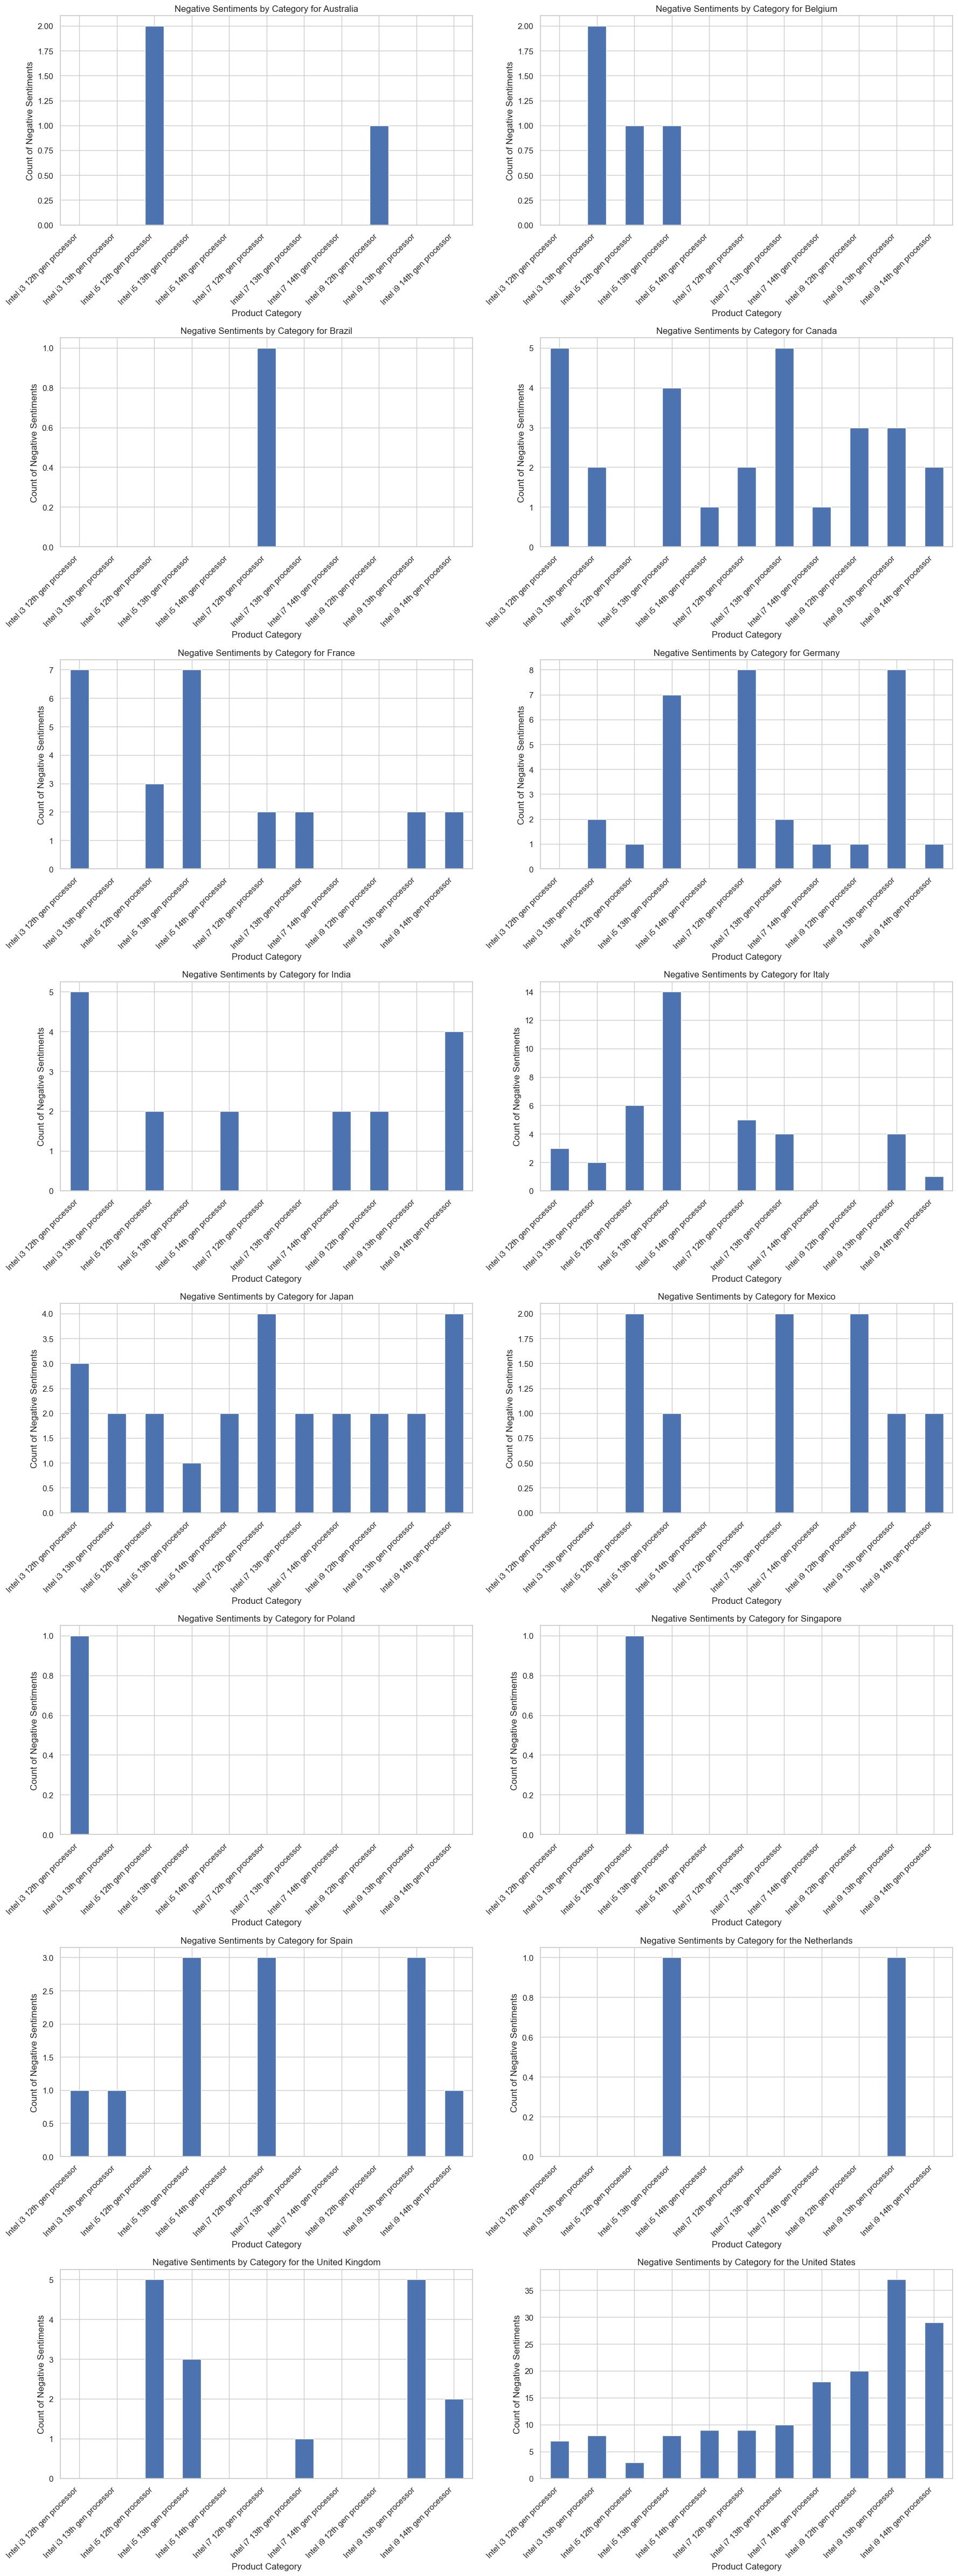

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_aspects is your DataFrame

# Filter the DataFrame to include only negative sentiments
negative_sentiments = df_aspects[df_aspects['sentiment'] == 'Negative']

# Group by country and category, and count the occurrences of negative sentiment
negative_sentiment_counts = negative_sentiments.groupby(['country', 'category']).size().unstack(fill_value=0)

# Calculate the number of rows needed for two columns
num_countries = len(negative_sentiment_counts.index)
num_cols = 2
num_rows = (num_countries + 1) // num_cols

# Create subplots with the calculated number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 6))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for ax, country in zip(axes, negative_sentiment_counts.index):
    negative_sentiment_counts.loc[country].plot(kind='bar', ax=ax)
    ax.set_title(f'Negative Sentiments by Category for {country}')
    ax.set_xlabel('Product Category')
    ax.set_ylabel('Count of Negative Sentiments')
    ax.set_xticklabels(negative_sentiment_counts.columns, rotation=45, ha='right')

# Remove any empty subplots
for i in range(num_countries, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better fit
plt.tight_layout()
plt.show()
